<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

In this project I will be exploring the trends in SAT and ACT participation rates and their respective total score from 2017, 2018 and 2019. 

The total score and the participation rates of each test vary largely from state to state. My goal is to uncover the underlying patterns, to be able to suggest appropriate solutions for the different state to be able to improve their score and their respective prefer test participation rates.

# FILL IN PLS

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

I have picked these data set to use:

SAT and ACT Scores:
* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [219]:
def mean(data):
    return sum(data) / len(data)

In [220]:
mean(range(1,10)) #(1+2+3+4+5+6+7+8+9)/9 = 5

5.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [221]:
def std(data):
    avg = mean(data)
    n = len(data)
    var_lst = []
    for i in data:
        var = (i - avg)**2
        var_lst.append(var)
    return (sum(var_lst)*(1/n))**0.5

In [222]:
std([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

2.8722813232690143

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [223]:
def percent_to_deci(percentage):
    return float(percentage.strip('%'))/100

In [224]:
percent_to_deci('50%')

0.5

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [225]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [226]:
act_2017 = pd.read_csv('/Users/User/Desktop/TrueDS/GA_DSi/edit_code/Project1234/project_1/data/act_2017.csv')
act_2018 = pd.read_csv('/Users/User/Desktop/TrueDS/GA_DSi/edit_code/Project1234/project_1/data/act_2018.csv')
act_2019 = pd.read_csv('/Users/User/Desktop/TrueDS/GA_DSi/edit_code/Project1234/project_1/data/act_2019.csv')
sat_2017 = pd.read_csv('/Users/User/Desktop/TrueDS/GA_DSi/edit_code/Project1234/project_1/data/sat_2017.csv')
sat_2018 = pd.read_csv('/Users/User/Desktop/TrueDS/GA_DSi/edit_code/Project1234/project_1/data/sat_2018.csv')
sat_2019 = pd.read_csv('/Users/User/Desktop/TrueDS/GA_DSi/edit_code/Project1234/project_1/data/sat_2019.csv')

### 2017 Data

In [227]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [228]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [229]:
# view data types 
print(act_2017.info())
print(sat_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math              

2017 ACT data
- Contains 52 rows
- Columns: states, participation percentage, composite score, and individual scores for english, math, reading, and science.
    - The 'states' and 'participation' columns are object and the score columns are float, except for the composite score column, which is an object.
- No missing values

2017 SAT data 
- Contains 51 rows
- Columns: states, participation percentage, Evidence-Based Reading and Writing score, math score, and the total score. 
    -  The 'states' and 'participation' columns are object types while the score columns are int.
- No missing values.

Overall the data appear to be complete for the 50 states in the US, with the SAT having one and ACT having two extra rows which need to be checked. In both data the participation appears to be in a percentage object where it will be changed to a float for easy manipulation.

In [230]:
set(act_2017['State']).difference(set(sat_2017['State']))

{'National'}

In [231]:
act_2017.shape #50 states (National and District of Columbia)

(52, 7)

In [232]:
sat_2017.shape #50 states (District of Columbia)

(51, 5)

After checking each of the data, they have all 50 states, where the ACT score have 2 extra rows for National and Distric of Columbia score, while the SAT have one extra for Distric of Columbia socre.

They are noted and not removed yet. Next we will be turning the participation column into an object value.

In [233]:
act_2017['Participation'] = act_2017['Participation'].apply(lambda x : percent_to_deci(x))
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [234]:
sat_2017['Participation'] = sat_2017['Participation'].apply(lambda x : percent_to_deci(x))
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [235]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [236]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

### 2018 Data

In [237]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [238]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [239]:
print(act_2018.info())
print(sat_2018.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None


2018 ACT data 
- Contains 52 rows
- Columns: states, participation percentage and composite score
    - The 'states' and 'participation' columns are object and the composite score column is a float.
- No missing values

The 2018 SAT data
- Contains 51 rows
- Columns: states, participation percentage, Evidence-Based Reading and Writing score, math score, and the total score.
    - The 'states' and 'participation' columns are object types while the score columns are int.
- No missing values in this data set

Overall the data appear to be complete for the 50 states in the US, with the SAT having one and ACT having two extra rows which will be checked. In both data the participation appears to be in a percentage object where it will be changed to a float for easy manipulation.

In [240]:
set(act_2018['State']).difference(set(sat_2018['State']))

{'District of columbia'}

In [241]:
set(sat_2018['State']).difference(set(act_2018['State']))

{'District of Columbia'}

In [242]:
#Drop duplicate Maine from ACT 2018
act2018 = act_2018.drop([19])
act2018.reset_index(drop=True,inplace=True)
act2018.iloc[18:23]

,State,Participation,Composite
18,Louisiana,100%,19.2
19,Maine,7%,24.0
20,Maryland,31%,22.5
21,Massachusetts,25%,25.5
22,Michigan,22%,24.2


In [243]:
act2018.shape

(51, 3)

In [244]:
#making sure District of Columbia is spelled the same
act2018.loc[8,'State'] = 'District of Columbia'
act2018.iloc[7:9]

,State,Participation,Composite
7,Delaware,17%,23.8
8,District of Columbia,32%,23.6


In [245]:
sat_2018.shape

(51, 5)

After checking each of the data should have 51 rows where there are 50 states plus District of Columbia. In ACT 2018 we drop Maine since there was a duplicate. Next we will be turning 'participation' object column to float. 

In [246]:
act2018['Participation'] = act2018['Participation'].apply(lambda x : percent_to_deci(x))
act2018.head()

,State,Participation,Composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [247]:
sat_2018['Participation'] = sat_2018['Participation'].apply(lambda x : percent_to_deci(x))
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [248]:
act2018.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [249]:
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

### 2019 Data

In [250]:
act_2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [251]:
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [252]:
print(act_2019.info())
print(sat_2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB
None


2019 ACT data
- Contains 52 rows
- Columns: states, participation percentage and composite score
    - The 'states' and 'participation' columns are object and the composite score column is a float.
- No missing values

2019 SAT data
- Contains 53 rows
- Columns: states, participation percentage, Evidence-Based Reading and Writing score, math score, and the total score.
    - The 'states' and 'participation' columns are object types while the score columns are int.
- No missing values 

Overall the data appear to be complete for the 50 states in the US, with the SAT having three and ACT having two extra rows which will be checked. In both data the participation appears to be in a percentage object where it will be changed to a float for easy manipulation.

In [253]:
set(act_2019['State']).difference(set(sat_2019['State']))

{'National'}

In [254]:
set(sat_2019['State']).difference(set(act_2019['State']))

{'Puerto Rico', 'Virgin Islands'}

In [255]:
#Drop 'Puerto Rico'[39], 'Virgin Islands'[47] since they are not a US state from SAT 2019
sat2019 = sat_2019.drop([39,47])
sat2019.reset_index(drop=True,inplace=True)
sat2019.iloc[35:50]

,State,Participation Rate,EBRW,Math,Total
35,Ohio,19%,550,548,1097
36,Oklahoma,22%,490,472,963
37,Oregon,51%,562,550,1112
38,Pennsylvania,70%,545,537,1082
39,Rhode Island,100%,503,492,995
40,South Carolina,68%,526,504,1030
41,South Dakota,3%,633,635,1268
42,Tennessee,7%,618,602,1220
43,Texas,68%,515,507,1022
44,Utah,4%,614,615,1230


In [256]:
act_2019.shape

(52, 3)

In [257]:
sat2019.shape

(51, 5)

After checking each of the data have all 50 states, where ACT contains 52 rows with 2 extra from National data and district of columbia data, while SAT 2019 should have 51 rows where the extra is also the District of Columbia. 

In SAT 2019 we drop 'Puerto Rico'[39], 'Virgin Islands'[47] since they are not a US state. Next we will be turning 'participation' object column to float. 

In [258]:
act_2019['Participation'] = act_2019['Participation'].apply(lambda x : percent_to_deci(x))
act_2019.head()

,State,Participation,Composite
0,Alabama,1.00,18.9
1,Alaska,0.38,20.1
2,Arizona,0.73,19.0
3,Arkansas,1.00,19.3
4,California,0.23,22.6


In [259]:
sat2019['Participation Rate'] = sat2019['Participation Rate'].apply(lambda x : percent_to_deci(x))
sat2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


Since only some test and year have score for 'National' we will be dropping Nation score from the data set (act_2019 and act_2017) making all the data set having 51 rows (50 states + District of Columbia)

In [260]:
#Drop National score
act2019 = act_2019.drop([51])
act2019.reset_index(drop=True,inplace=True)
act2019.iloc[49:]

,State,Participation,Composite
49,Wisconsin,1.0,20.3
50,Wyoming,1.0,19.8


In [261]:
#Drop National score
act2017 = act_2017.drop([0])
act2017.reset_index(drop=True,inplace=True)
act2017.iloc[:5]

,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.31,22.5,22.7,23.1,22.2,22.8


In [262]:
#Check all data shape
print(sat_2017.shape)
print(act2017.shape)
print(sat_2018.shape)
print(act2018.shape)
print(sat2019.shape)
print(act2019.shape)

(51, 5)
(51, 7)
(51, 5)
(51, 3)
(51, 5)
(51, 3)


In [263]:
#explore act2017
act2017.head(2) #other ACT score does not have individual score so we will drop them
act2017 = act2017.drop(['English','Math','Reading','Science'],axis=1)
act2017.head(2)

,State,Participation,Composite
0,Alabama,1.00,19.2
1,Alaska,0.65,19.8


In [264]:
act2017.shape

(51, 3)

Now that all have the same columns and shape we will then look at each data column name to make them match  for merging

In [265]:
print(sat_2017.columns) #change Evidence-Based Reading and Writing to ebrw
print(act2017.columns)
print(sat_2018.columns) #change Evidence-Based Reading and Writing to ebrw
print(act2018.columns)
print(sat2019.columns) #need to change participation rate to participation
print(act2019.columns)

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')
Index(['State', 'Participation', 'Composite'], dtype='object')
Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')
Index(['State', 'Participation', 'Composite'], dtype='object')
Index(['State', 'Participation Rate', 'EBRW', 'Math', 'Total'], dtype='object')
Index(['State', 'Participation', 'Composite'], dtype='object')


In [266]:
sat2017 = sat_2017.rename(columns={'Evidence-Based Reading and Writing': 'EBRW'})
sat2017.head(2)

,State,Participation,EBRW,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080


In [267]:
sat2018 = sat_2018.rename(columns={'Evidence-Based Reading and Writing': 'EBRW'})
sat2018.head(2)

,State,Participation,EBRW,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106


In [268]:
sat2019 = sat2019.rename(columns={'Participation Rate': 'Participation'})
sat2019.head(2)

,State,Participation,EBRW,Math,Total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097


In [269]:
#Recheck Columns name
print(sat2017.columns) 
print(act2017.columns)
print(sat2018.columns)
print(act2018.columns)
print(sat2019.columns)
print(act2019.columns)

Index(['State', 'Participation', 'EBRW', 'Math', 'Total'], dtype='object')
Index(['State', 'Participation', 'Composite'], dtype='object')
Index(['State', 'Participation', 'EBRW', 'Math', 'Total'], dtype='object')
Index(['State', 'Participation', 'Composite'], dtype='object')
Index(['State', 'Participation', 'EBRW', 'Math', 'Total'], dtype='object')
Index(['State', 'Participation', 'Composite'], dtype='object')


### Combining Data

In [270]:
#Checking Columns type
print(sat2017.dtypes) 
print(act2017.dtypes) #Composite have to be float 
print(sat2018.dtypes) 
print(act2018.dtypes) 
print(sat2019.dtypes) 
print(act2019.dtypes) 

State             object
Participation    float64
EBRW               int64
Math               int64
Total              int64
dtype: object
State             object
Participation    float64
Composite         object
dtype: object
State             object
Participation    float64
EBRW               int64
Math               int64
Total              int64
dtype: object
State             object
Participation    float64
Composite        float64
dtype: object
State             object
Participation    float64
EBRW               int64
Math               int64
Total              int64
dtype: object
State             object
Participation    float64
Composite        float64
dtype: object


In [271]:
act2017.tail() # index 50 have 20.2x need to edit to 20.2
act2017.loc[50,'Composite'] = 20.2
act2017.tail()

,State,Participation,Composite
46,Virginia,0.29,23.8
47,Washington,0.29,21.9
48,West Virginia,0.69,20.4
49,Wisconsin,1.00,20.5
50,Wyoming,1.00,20.2


In [272]:
act2017['Composite']=pd.to_numeric(act2017['Composite'], downcast="float")
act2017.dtypes

State             object
Participation    float64
Composite        float32
dtype: object

In [273]:
#remnaming by year and test type
def rename_col(df,year,test):
    sat_rename = {'Participation':'sat_participation_' + str(year),
                 'EBRW':'sat_ebrw_'+ str(year),
                 'Math':'sat_math_'+ str(year),
                 'Total':'sat_total_'+ str(year)}
    act_rename = {'Participation':'act_participation_'+ str(year),
                 'Composite':'act_total_'+ str(year)}
    if str(test)=="sat":
        df.rename(columns=sat_rename,inplace=True)
    else:
        df.rename(columns=act_rename,inplace=True)

In [274]:
rename_col(sat2017,2017,'sat')
rename_col(act2017,2017,'act')
rename_col(sat2018,2018,'sat')
rename_col(act2018,2018,'act')
rename_col(sat2019,2019,'sat')
rename_col(act2019,2019,'act')

#recheck
print(sat2017.columns) 
print(act2017.columns)
print(sat2018.columns)
print(act2018.columns)
print(sat2019.columns)
print(act2019.columns)

Index(['State', 'sat_participation_2017', 'sat_ebrw_2017', 'sat_math_2017',
       'sat_total_2017'],
      dtype='object')
Index(['State', 'act_participation_2017', 'act_total_2017'], dtype='object')
Index(['State', 'sat_participation_2018', 'sat_ebrw_2018', 'sat_math_2018',
       'sat_total_2018'],
      dtype='object')
Index(['State', 'act_participation_2018', 'act_total_2018'], dtype='object')
Index(['State', 'sat_participation_2019', 'sat_ebrw_2019', 'sat_math_2019',
       'sat_total_2019'],
      dtype='object')
Index(['State', 'act_participation_2019', 'act_total_2019'], dtype='object')


In [275]:
# merging sat2017 and act2017
score2017 = pd.merge(sat2017,act2017,left_index=True,right_index=True)
score2017.head() #extra state row need to be drop

,State_x,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,State_y,act_participation_2017,act_total_2017
0,Alabama,0.05,593,572,1165,Alabama,1.00,19.200001
1,Alaska,0.38,547,533,1080,Alaska,0.65,19.799999
2,Arizona,0.30,563,553,1116,Arizona,0.62,19.700001
3,Arkansas,0.03,614,594,1208,Arkansas,1.00,19.400000
4,California,0.53,531,524,1055,California,0.31,22.799999


In [276]:
score2017 = score2017.drop(['State_y'],axis=1)
score2017.head()

,State_x,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_total_2017
0,Alabama,0.05,593,572,1165,1.00,19.200001
1,Alaska,0.38,547,533,1080,0.65,19.799999
2,Arizona,0.30,563,553,1116,0.62,19.700001
3,Arkansas,0.03,614,594,1208,1.00,19.400000
4,California,0.53,531,524,1055,0.31,22.799999


In [277]:
score2017.to_csv('/Users/User/Desktop/TrueDS/GA_DSi/edit_code/Project1234/project_1/data/all_2017.csv')

In [278]:
# merging sat2018 and act2018
score2018 = pd.merge(sat2018,act2018,left_index=True,right_index=True)
score2018.head() #extra state row need to be drop

,State_x,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,State_y,act_participation_2018,act_total_2018
0,Alabama,0.06,595,571,1166,Alabama,1.00,19.1
1,Alaska,0.43,562,544,1106,Alaska,0.33,20.8
2,Arizona,0.29,577,572,1149,Arizona,0.66,19.2
3,Arkansas,0.05,592,576,1169,Arkansas,1.00,19.4
4,California,0.60,540,536,1076,California,0.27,22.7


In [279]:
score2018 = score2018.drop(['State_y'],axis=1)
score2018.head()

,State_x,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018
0,Alabama,0.06,595,571,1166,1.00,19.1
1,Alaska,0.43,562,544,1106,0.33,20.8
2,Arizona,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4
4,California,0.60,540,536,1076,0.27,22.7


In [280]:
score2018.to_csv('/Users/User/Desktop/TrueDS/GA_DSi/edit_code/Project1234/project_1/data/all_2018.csv')

In [281]:
# merging sat2019 and act2019
score2019 = pd.merge(sat2019,act2019,left_index=True,right_index=True)
score2019.head() #extra state row need to be drop

,State_x,sat_participation_2019,sat_ebrw_2019,sat_math_2019,sat_total_2019,State_y,act_participation_2019,act_total_2019
0,Alabama,0.07,583,560,1143,Alabama,1.00,18.9
1,Alaska,0.41,556,541,1097,Alaska,0.38,20.1
2,Arizona,0.31,569,565,1134,Arizona,0.73,19.0
3,Arkansas,0.06,582,559,1141,Arkansas,1.00,19.3
4,California,0.63,534,531,1065,California,0.23,22.6


In [282]:
score2019 = score2019.drop(['State_y'],axis=1)
score2019.head()

,State_x,sat_participation_2019,sat_ebrw_2019,sat_math_2019,sat_total_2019,act_participation_2019,act_total_2019
0,Alabama,0.07,583,560,1143,1.00,18.9
1,Alaska,0.41,556,541,1097,0.38,20.1
2,Arizona,0.31,569,565,1134,0.73,19.0
3,Arkansas,0.06,582,559,1141,1.00,19.3
4,California,0.63,534,531,1065,0.23,22.6


In [283]:
score2019.to_csv('/Users/User/Desktop/TrueDS/GA_DSi/edit_code/Project1234/project_1/data/all_2019.csv')

In [284]:
#Merge all score (score2017,score2018,score2019)
allscore_1 = pd.merge(score2017,score2018,left_index=True,right_index=True)
allscore_1.head()  #extra state row need to be drop
allscore_1 = allscore_1.drop(['State_x_y'],axis=1)
allscore_1.head()

,State_x_x,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_total_2017,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018
0,Alabama,0.05,593,572,1165,1.00,19.200001,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,19.799999,0.43,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,19.700001,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,1.00,19.400000,0.05,592,576,1169,1.00,19.4
4,California,0.53,531,524,1055,0.31,22.799999,0.60,540,536,1076,0.27,22.7


In [285]:
#Merge all score (score2017,score2018,score2019)
allscore = pd.merge(allscore_1,score2019,left_index=True,right_index=True)
allscore.head() #extra state row need to be drop
allscore = allscore.drop(['State_x'],axis=1)
allscore.head()

,State_x_x,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_total_2017,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,sat_participation_2019,sat_ebrw_2019,sat_math_2019,sat_total_2019,act_participation_2019,act_total_2019
0,Alabama,0.05,593,572,1165,1.00,19.200001,0.06,595,571,1166,1.00,19.1,0.07,583,560,1143,1.00,18.9
1,Alaska,0.38,547,533,1080,0.65,19.799999,0.43,562,544,1106,0.33,20.8,0.41,556,541,1097,0.38,20.1
2,Arizona,0.30,563,553,1116,0.62,19.700001,0.29,577,572,1149,0.66,19.2,0.31,569,565,1134,0.73,19.0
3,Arkansas,0.03,614,594,1208,1.00,19.400000,0.05,592,576,1169,1.00,19.4,0.06,582,559,1141,1.00,19.3
4,California,0.53,531,524,1055,0.31,22.799999,0.60,540,536,1076,0.27,22.7,0.63,534,531,1065,0.23,22.6


In [286]:
allscore = allscore.rename(columns={'State_x_x':'state'})
allscore.head()

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_total_2017,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,sat_participation_2019,sat_ebrw_2019,sat_math_2019,sat_total_2019,act_participation_2019,act_total_2019
0,Alabama,0.05,593,572,1165,1.00,19.200001,0.06,595,571,1166,1.00,19.1,0.07,583,560,1143,1.00,18.9
1,Alaska,0.38,547,533,1080,0.65,19.799999,0.43,562,544,1106,0.33,20.8,0.41,556,541,1097,0.38,20.1
2,Arizona,0.30,563,553,1116,0.62,19.700001,0.29,577,572,1149,0.66,19.2,0.31,569,565,1134,0.73,19.0
3,Arkansas,0.03,614,594,1208,1.00,19.400000,0.05,592,576,1169,1.00,19.4,0.06,582,559,1141,1.00,19.3
4,California,0.53,531,524,1055,0.31,22.799999,0.60,540,536,1076,0.27,22.7,0.63,534,531,1065,0.23,22.6


In [287]:
#same format to 1 decimal place
allscore['act_total_2017'] = allscore['act_total_2017'].apply(lambda x: round(x, 1))
allscore.head()

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_total_2017,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,sat_participation_2019,sat_ebrw_2019,sat_math_2019,sat_total_2019,act_participation_2019,act_total_2019
0,Alabama,0.05,593,572,1165,1.00,19.2,0.06,595,571,1166,1.00,19.1,0.07,583,560,1143,1.00,18.9
1,Alaska,0.38,547,533,1080,0.65,19.8,0.43,562,544,1106,0.33,20.8,0.41,556,541,1097,0.38,20.1
2,Arizona,0.30,563,553,1116,0.62,19.7,0.29,577,572,1149,0.66,19.2,0.31,569,565,1134,0.73,19.0
3,Arkansas,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169,1.00,19.4,0.06,582,559,1141,1.00,19.3
4,California,0.53,531,524,1055,0.31,22.8,0.60,540,536,1076,0.27,22.7,0.63,534,531,1065,0.23,22.6


In [288]:
allscore.dtypes

state                      object
sat_participation_2017    float64
sat_ebrw_2017               int64
sat_math_2017               int64
sat_total_2017              int64
act_participation_2017    float64
act_total_2017            float64
sat_participation_2018    float64
sat_ebrw_2018               int64
sat_math_2018               int64
sat_total_2018              int64
act_participation_2018    float64
act_total_2018            float64
sat_participation_2019    float64
sat_ebrw_2019               int64
sat_math_2019               int64
sat_total_2019              int64
act_participation_2019    float64
act_total_2019            float64
dtype: object

In [289]:
allscore.to_csv('/Users/User/Desktop/TrueDS/GA_DSi/edit_code/Project1234/project_1/data/all_score.csv')

In [290]:
allscore

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_total_2017,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,sat_participation_2019,sat_ebrw_2019,sat_math_2019,sat_total_2019,act_participation_2019,act_total_2019
0,Alabama,0.05,593,572,1165,1.00,19.2,0.06,595,571,1166,1.00,19.1,0.07,583,560,1143,1.00,18.9
1,Alaska,0.38,547,533,1080,0.65,19.8,0.43,562,544,1106,0.33,20.8,0.41,556,541,1097,0.38,20.1
2,Arizona,0.30,563,553,1116,0.62,19.7,0.29,577,572,1149,0.66,19.2,0.31,569,565,1134,0.73,19.0
3,Arkansas,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169,1.00,19.4,0.06,582,559,1141,1.00,19.3
4,California,0.53,531,524,1055,0.31,22.8,0.60,540,536,1076,0.27,22.7,0.63,534,531,1065,0.23,22.6
5,Colorado,0.11,606,595,1201,1.00,20.8,1.00,519,506,1025,0.30,23.9,1.00,518,506,1024,0.27,23.8
6,Connecticut,1.00,530,512,1041,0.31,25.2,1.00,535,519,1053,0.26,25.6,1.00,529,516,1046,0.22,25.5
7,Delaware,1.00,503,492,996,0.18,24.1,1.00,505,492,998,0.17,23.8,1.00,499,486,985,0.13,24.1
8,District of Columbia,1.00,482,468,950,0.32,24.2,0.92,497,480,977,0.32,23.6,0.94,495,480,975,0.32,23.5
9,Florida,0.83,520,497,1017,0.73,19.8,0.56,550,549,1099,0.66,19.9,1.00,516,483,999,0.54,20.1


### Data Dictionary

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|allscore|Name of all 50 states plus District of Columbia|
|sat_participation_2017|float|sat2017|SAT Participation rate in 2017|
|sat_ebrw_2017|int|sat2017|SAT Evidence-Based Reading and Writing score in 2017|
|sat_math_2017|int|sat2017|SAT Math score in 2017|
|sat_total_2017|int|sat2017|Total SAT score in 2017|
|act_participation_2017|float|act2017|ACT Participation rate in 2017|
|act_total_2017|float|act2017|Total ACT score in 2017|
|sat_participation_2018|float|sat2018|SAT Participation rate in 2018|
|sat_ebrw_2018|int|sat2018|SAT Evidence-Based Reading and Writing score in 2018|
|sat_math_2018|int|sat2018|SAT Math score in 2018|
|sat_total_2018|int|sat2018|Total SAT score in 2018|
|act_participation_2018|float|act2018|ACT Participation rate in 2018|
|act_total_2018|float|act2018|Total ACT score in 2018|
|sat_participation_2019|float|sat2019|SAT Participation rate in 2019|
|sat_ebrw_2019|int|sat2019|SAT Evidence-Based Reading and Writing score in 2019|
|sat_math_2019|int|sat2019|SAT Math score in 2019|
|sat_total_2019|int|sat2019|Total SAT score in 2019|
|act_participation_2019|float|act2019|ACT Participation rate in 2019|
|act_total_2019|float|act2019|Total ACT score in 2019|

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2018, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2018, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [291]:
round(allscore.describe().T,1)

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,0.4,0.4,0.0,0.0,0.4,0.7,1.0
sat_ebrw_2017,51.0,569.1,45.7,482.0,533.5,559.0,613.0,644.0
sat_math_2017,51.0,547.6,84.9,52.0,522.0,548.0,599.0,651.0
sat_total_2017,51.0,1126.1,92.5,950.0,1055.5,1107.0,1212.0,1295.0
act_participation_2017,51.0,0.7,0.3,0.1,0.3,0.7,1.0,1.0
act_total_2017,51.0,21.5,2.0,17.8,19.8,21.4,23.6,25.5
sat_participation_2018,51.0,0.5,0.4,0.0,0.0,0.5,0.8,1.0
sat_ebrw_2018,51.0,563.7,47.5,480.0,534.5,552.0,610.5,643.0
sat_math_2018,51.0,556.2,47.8,480.0,522.5,544.0,593.5,655.0
sat_total_2018,51.0,1120.0,94.2,977.0,1057.5,1098.0,1204.0,1298.0


In [292]:
sd = {col : std(allscore[col]) for col in allscore.columns[1:]}
sd

{'sat_participation_2017': 0.3492907076664507,
 'sat_ebrw_2017': 45.21697020437866,
 'sat_math_2017': 84.07255521608297,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 0.3182417575123181,
 'act_total_2017': 2.000786081581989,
 'sat_participation_2018': 0.3694661922353942,
 'sat_ebrw_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433,
 'act_participation_2018': 0.33701735820410317,
 'act_total_2018': 2.090779082141178,
 'sat_participation_2019': 0.3836584048685726,
 'sat_ebrw_2019': 45.792378682545134,
 'sat_math_2019': 50.78521461840036,
 'sat_total_2019': 96.24027185617864,
 'act_participation_2019': 0.3417582373703047,
 'act_total_2019': 2.172901153595978}

### Trends Exploration

#### Participation Rates

#### *Which states have the highest and lowest participation rates for the 2017, 2018, or 2019 SAT and ACT?*

In [293]:
#exploring 2017 participation rate
sat2017_parti = allscore[['state','sat_participation_2017']].sort_values('sat_participation_2017',ascending=False)
sat2017_parti.head()
#list(sat2017_parti['state'].head())

,state,sat_participation_2017
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


In [294]:
sat2017_parti.tail()
#list(sat2017_parti['state'].tail())

,state,sat_participation_2017
3,Arkansas,0.03
50,Wyoming,0.03
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02


In [295]:
act2017_parti = allscore[['state','act_participation_2017']].sort_values('act_participation_2017',ascending=False)
act2017_parti.head()
#list(act2017_parti['state'].head())

,state,act_participation_2017
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0


In [296]:
act2017_parti.tail()
#list(act2017_parti['state'].tail())

,state,act_participation_2017
38,Pennsylvania,0.23
39,Rhode Island,0.21
7,Delaware,0.18
29,New Hampshire,0.18
19,Maine,0.08


In [297]:
#exploring 2018 participation rate
sat2018_parti = allscore[['state','sat_participation_2018']].sort_values('sat_participation_2018',ascending=False)
sat2018_parti.head()
#list(sat2018_parti['state'].head())

,state,sat_participation_2018
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
22,Michigan,1.0
12,Idaho,1.0


In [298]:
sat2018_parti.tail()
#list(sat2018_parti['state'].tail())

,state,sat_participation_2018
24,Mississippi,0.03
15,Iowa,0.03
49,Wisconsin,0.03
50,Wyoming,0.03
34,North Dakota,0.02


In [299]:
act2018_parti = allscore[['state','act_participation_2018']].sort_values('act_participation_2018',ascending=False)
act2018_parti.head() 
#list(act2018_parti['state'].head())

,state,act_participation_2018
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0


In [300]:
act2018_parti.tail() 
#list(act2018_parti['state'].tail())

,state,act_participation_2018
38,Pennsylvania,0.20
7,Delaware,0.17
29,New Hampshire,0.16
39,Rhode Island,0.15
19,Maine,0.07


In [301]:
#exploring 2019 participation rate
sat2019_parti = allscore[['state','sat_participation_2019']].sort_values('sat_participation_2019',ascending=False)
sat2019_parti.head()
#list(sat2019_parti['state'].head())

,state,sat_participation_2019
39,Rhode Island,1.0
13,Illinois,1.0
22,Michigan,1.0
5,Colorado,1.0
6,Connecticut,1.0


In [302]:
sat2019_parti.tail()
#list(sat2019_parti['state'].tail())

,state,sat_participation_2019
24,Mississippi,0.03
15,Iowa,0.03
49,Wisconsin,0.03
50,Wyoming,0.03
34,North Dakota,0.02


In [303]:
act2019_parti = allscore[['state','act_participation_2019']].sort_values('act_participation_2019',ascending=False)
act2019_parti.head()
#list(act2019_parti['state'].head())

,state,act_participation_2019
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0


In [304]:
act2019_parti.tail()
#list(act2019_parti['state'].tail())

,state,act_participation_2019
38,Pennsylvania,0.17
29,New Hampshire,0.14
7,Delaware,0.13
39,Rhode Island,0.12
19,Maine,0.06


After exploring the participation rate for top 5 and lowest 5 states in each year for SAT and ACT test, here is the summary of what I found:

|Year|Test|Top 5 highest state|Lowest 5 states|
|---|---|---|---|
|2017|SAT|'District of Columbia'<br/>'Michigan'<br/>'Connecticut'<br/>'Delaware'<br/>'New Hampshire'|'Arkansas'<br/>'Wyoming'<br/>'North Dakota'<br/>'Mississippi'<br/>'Iowa'|
|2018|SAT|'Colorado'<br/>'Connecticut'<br/>'Delaware'<br/>'Michigan'<br/>'Idaho'|'Mississippi'<br/>'Iowa'<br/>'Wisconsin'<br/>'Wyoming'<br/>'North Dakota'|
|2019|SAT|'Rhode Island'<br/>'Illinois'<br/>'Michigan'<br/>'Colorado'<br/>'Connecticut'|'Mississippi'<br/>'Iowa'<br/>'Wisconsin'<br/>'Wyoming'<br/>'North Dakota'|
|2017|ACT|'Alabama'<br/>'Kentucky'<br/>'Wisconsin'<br/>'Utah'<br/>'Tennessee'|'Pennsylvania'<br/>'Rhode Island'<br/>'Delaware'<br/>'New Hampshire'<br/>'Maine'|
|2018|ACT|'Alabama'<br/>'Kentucky'<br/>'Wisconsin'<br/>'Utah'<br/>'Tennessee'|Pennsylvania'<br/>'Delaware'<br/>'New Hampshire'<br/>'Rhode Island'<br/>'Maine'|
|2019|ACT|'Alabama'<br/>'Kentucky'<br/>'Wisconsin'<br/>'Utah'<br/>'Tennessee'|'Pennsylvania'<br/>'New Hampshire'<br/>'Delaware'<br/>'Rhode Island'<br/>'Maine'|

From the table we can see that states like 'Michigan','Connecticut' and 'Delaware' are always the top in the top 5 with the highest participation rate across the 3 year.

However, with the ACT many states have very high participation rate so the top 5 states, 'Pennsylvania', 'New Hampshire', 'Delaware', 'Rhode Island' and 'Maine' were repeated throughout the 3 years. This will be explored further in the next section where we look at all the states with 100% participation rate and how many there are.

#### *Do any states with 100% participation on a given test have a rate change year-to-year?*

In [305]:
allscore['sat_participation_2017'].value_counts() #4 state with 100% participation
sat17_list = list(allscore[allscore['sat_participation_2017'] >= 1]['state'])
sat17_list

['Connecticut', 'Delaware', 'District of Columbia', 'Michigan']

In [306]:
allscore['act_participation_2017'].value_counts() #17 state with 100% participation
act17_list = list(allscore[allscore['act_participation_2017'] >= 1]['state']) 
act17_list

['Alabama',
 'Arkansas',
 'Colorado',
 'Kentucky',
 'Louisiana',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nevada',
 'North Carolina',
 'Oklahoma',
 'South Carolina',
 'Tennessee',
 'Utah',
 'Wisconsin',
 'Wyoming']

In [307]:
#check for changes from SAT 2017 to 2018 and 2019
sat17_check = allscore[allscore['state'].isin(sat17_list)]
sat17_check[['state','sat_participation_2017','sat_participation_2018','sat_participation_2019']]

,state,sat_participation_2017,sat_participation_2018,sat_participation_2019
6,Connecticut,1.0,1.00,1.00
7,Delaware,1.0,1.00,1.00
8,District of Columbia,1.0,0.92,0.94
22,Michigan,1.0,1.00,1.00


In SAT 2017 test Connecticut, Delaware and Michigan show no changes in full participation over the three years.

However there is a change in District of Columbia participation rate from 2017 to 2018. We will explore the changes futher.

In [308]:
#check for changes from ACT 2017 to 2018 and 2019
act17_check = allscore[allscore['state'].isin(act17_list)]
act17_check[['state','act_participation_2017','act_participation_2018','act_participation_2019']]

,state,act_participation_2017,act_participation_2018,act_participation_2019
0,Alabama,1.0,1.00,1.00
3,Arkansas,1.0,1.00,1.00
5,Colorado,1.0,0.30,0.27
17,Kentucky,1.0,1.00,1.00
18,Louisiana,1.0,1.00,1.00
23,Minnesota,1.0,0.99,0.95
24,Mississippi,1.0,1.00,1.00
25,Missouri,1.0,1.00,0.82
26,Montana,1.0,1.00,1.00
28,Nevada,1.0,1.00,1.00


Only Colorado and Minnesota had a decrease in ACT participation rate from 2017 to 2018 as well as to 2019. We will explore this futher.

In [309]:
allscore['sat_participation_2018'].value_counts() #5 state with 100% participation
sat18_list = list(allscore[allscore['sat_participation_2018'] >= 1]['state'])
sat18_list

['Colorado', 'Connecticut', 'Delaware', 'Idaho', 'Michigan']

In [310]:
allscore['act_participation_2018'].value_counts() #17 state with 100% participation
act18_list = list(allscore[allscore['act_participation_2018'] >= 1]['state']) 
act18_list

['Alabama',
 'Arkansas',
 'Kentucky',
 'Louisiana',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'North Carolina',
 'Ohio',
 'Oklahoma',
 'South Carolina',
 'Tennessee',
 'Utah',
 'Wisconsin',
 'Wyoming']

In [311]:
#check for changes from SAT 2018 to 2019
sat18_check = allscore[allscore['state'].isin(sat18_list)]
sat18_check[['state','sat_participation_2018','sat_participation_2019']]

,state,sat_participation_2018,sat_participation_2019
5,Colorado,1.0,1.0
6,Connecticut,1.0,1.0
7,Delaware,1.0,1.0
12,Idaho,1.0,1.0
22,Michigan,1.0,1.0


All 5 states that had full participation in the SAT 2018 exam remained the same rate of participation in SAT 2019 exam.

In [312]:
#check for changes from ACT 2018 to 2019
act18_check = allscore[allscore['state'].isin(act18_list)]
act18_check[['state','act_participation_2018','act_participation_2019']]

,state,act_participation_2018,act_participation_2019
0,Alabama,1.0,1.00
3,Arkansas,1.0,1.00
17,Kentucky,1.0,1.00
18,Louisiana,1.0,1.00
24,Mississippi,1.0,1.00
25,Missouri,1.0,0.82
26,Montana,1.0,1.00
27,Nebraska,1.0,1.00
28,Nevada,1.0,1.00
33,North Carolina,1.0,1.00


Missouri and South Carolina had a change in participation rate in ACT 2018 to ACT 2019. This will be explore futher.

Calculating Participation Change for the state that have 100% participation for each year and the changes for the next year.

In [313]:
def percent_change(new,old):
    result = round((new-old)*100,2)
    print(result,'%')
    print('The previous participation rate is:',old)
    print('The new participation rate is:',new)

In [314]:
#find percentage change for District of Columbia 2017 to 2018 SAT
print(allscore['state'].iloc[8], 'SAT participation rate changed from 2017 to 2018 by') 
percent_change(allscore['sat_participation_2018'].iloc[8],allscore['sat_participation_2017'].iloc[8])

District of Columbia SAT participation rate changed from 2017 to 2018 by
-8.0 %
The previous participation rate is: 1.0
The new participation rate is: 0.92


In [315]:
#find percentage change for District of Columbia 2018 to 2019 SAT
print(allscore['state'].iloc[8], 'SAT participation rate changed from 2018 to 2019 by') 
percent_change(allscore['sat_participation_2019'].iloc[8],allscore['sat_participation_2018'].iloc[8])

District of Columbia SAT participation rate changed from 2018 to 2019 by
2.0 %
The previous participation rate is: 0.92
The new participation rate is: 0.94


In [316]:
#find percentage change for District of Columbia 2017 to 2019 SAT
print(allscore['state'].iloc[8], 'SAT participation rate changed from 2017 to 2019 by') 
percent_change(allscore['sat_participation_2019'].iloc[8],allscore['sat_participation_2017'].iloc[8])

District of Columbia SAT participation rate changed from 2017 to 2019 by
-6.0 %
The previous participation rate is: 1.0
The new participation rate is: 0.94


In [317]:
#find percentage change for Colorado 2017 to 2018 ACT
print(allscore['state'].iloc[5], 'ACT participation rate changed from 2017 to 2018 by') 
percent_change(allscore['act_participation_2018'].iloc[5],allscore['act_participation_2017'].iloc[5])

Colorado ACT participation rate changed from 2017 to 2018 by
-70.0 %
The previous participation rate is: 1.0
The new participation rate is: 0.3


In [318]:
#find percentage change for Colorado 2018 to 2019 ACT
print(allscore['state'].iloc[5], 'ACT participation rate changed from 2018 to 2019 by') 
percent_change(allscore['act_participation_2019'].iloc[5],allscore['act_participation_2018'].iloc[5])

Colorado ACT participation rate changed from 2018 to 2019 by
-3.0 %
The previous participation rate is: 0.3
The new participation rate is: 0.27


In [319]:
#find percentage change for Colorado 2017 to 2019 ACT
print(allscore['state'].iloc[5], 'ACT participation rate changed from 2017 to 2019 by') 
percent_change(allscore['act_participation_2019'].iloc[5],allscore['act_participation_2017'].iloc[5])

Colorado ACT participation rate changed from 2017 to 2019 by
-73.0 %
The previous participation rate is: 1.0
The new participation rate is: 0.27


In [320]:
#find percentage change for Minnesota 2017 to 2018 ACT
print(allscore['state'].iloc[23], 'ACT participation rate changed from 2017 to 2018 by') 
percent_change(allscore['act_participation_2018'].iloc[23],allscore['act_participation_2017'].iloc[23])

Minnesota ACT participation rate changed from 2017 to 2018 by
-1.0 %
The previous participation rate is: 1.0
The new participation rate is: 0.99


In [321]:
#find percentage change for Minnesota 2018 to 2019 ACT
print(allscore['state'].iloc[23], 'ACT participation rate changed from 2018 to 2019 by') 
percent_change(allscore['act_participation_2019'].iloc[23],allscore['act_participation_2018'].iloc[23])

Minnesota ACT participation rate changed from 2018 to 2019 by
-4.0 %
The previous participation rate is: 0.99
The new participation rate is: 0.95


In [322]:
#find percentage change for Minnesota 2017 to 2019 ACT
print(allscore['state'].iloc[23], 'ACT participation rate changed from 2017 to 2019 by') 
percent_change(allscore['act_participation_2019'].iloc[23],allscore['act_participation_2017'].iloc[23])

Minnesota ACT participation rate changed from 2017 to 2019 by
-5.0 %
The previous participation rate is: 1.0
The new participation rate is: 0.95


In [323]:
#find percentage change for Missouri 2018 to 2019 ACT
print(allscore['state'].iloc[25], 'ACT participation rate changed from 2018 to 2019 by') 
percent_change(allscore['act_participation_2019'].iloc[25],allscore['act_participation_2018'].iloc[25])

Missouri ACT participation rate changed from 2018 to 2019 by
-18.0 %
The previous participation rate is: 1.0
The new participation rate is: 0.82


In [324]:
#find percentage change for South Carolina 2018 to 2019 ACT
print(allscore['state'].iloc[40], 'ACT participation rate changed from 2018 to 2019 by') 
percent_change(allscore['act_participation_2019'].iloc[40],allscore['act_participation_2018'].iloc[40])

South Carolina ACT participation rate changed from 2018 to 2019 by
-22.0 %
The previous participation rate is: 1.0
The new participation rate is: 0.78


Now I will add a row for Participation Change for 2017-2018, 2018-2019 and 2017-2019

In [325]:
#adding particiapation change
allscore['sat_parti_change_18(%)'] = round(((allscore['sat_participation_2018']-allscore['sat_participation_2017'])*100),2)
allscore['sat_parti_change_19(%)'] = round(((allscore['sat_participation_2019']-allscore['sat_participation_2018'])*100),2)
allscore['act_parti_change_18(%)'] = round(((allscore['act_participation_2018']-allscore['act_participation_2017'])*100),2)
allscore['act_parti_change_19(%)'] = round(((allscore['act_participation_2019']-allscore['act_participation_2018'])*100),2)
allscore['sat_parti_change_all(%)'] = round(((allscore['sat_participation_2019']-allscore['sat_participation_2017'])*100),2)
allscore['act_parti_change_all(%)'] = round(((allscore['act_participation_2019']-allscore['act_participation_2017'])*100),2)

In [326]:
allscore[['state','sat_parti_change_18(%)','sat_parti_change_19(%)','act_parti_change_18(%)','act_parti_change_19(%)','sat_parti_change_all(%)','act_parti_change_all(%)']].sort_values('state').head(5)

,state,sat_parti_change_18(%),sat_parti_change_19(%),act_parti_change_18(%),act_parti_change_19(%),sat_parti_change_all(%),act_parti_change_all(%)
0,Alabama,1.0,1.0,0.0,0.0,2.0,0.0
1,Alaska,5.0,-2.0,-32.0,5.0,3.0,-27.0
2,Arizona,-1.0,2.0,4.0,7.0,1.0,11.0
3,Arkansas,2.0,1.0,0.0,0.0,3.0,0.0
4,California,7.0,3.0,-4.0,-4.0,10.0,-8.0


In [327]:
allscore[['state','sat_parti_change_18(%)','sat_parti_change_19(%)','act_parti_change_18(%)','act_parti_change_19(%)','sat_parti_change_all(%)','act_parti_change_all(%)']].sort_values('state').tail(5)

,state,sat_parti_change_18(%),sat_parti_change_19(%),act_parti_change_18(%),act_parti_change_19(%),sat_parti_change_all(%),act_parti_change_all(%)
46,Virginia,3.0,0.0,-5.0,-3.0,3.0,-8.0
47,Washington,5.0,1.0,-5.0,0.0,6.0,-5.0
48,West Virginia,14.0,71.0,-4.0,-16.0,85.0,-20.0
49,Wisconsin,0.0,0.0,0.0,0.0,0.0,0.0
50,Wyoming,0.0,0.0,0.0,0.0,0.0,0.0


In [328]:
allscore[['state','sat_parti_change_18(%)']].sort_values('sat_parti_change_18(%)').head(5)

,state,sat_parti_change_18(%)
9,Florida,-27.0
8,District of Columbia,-8.0
35,Ohio,-4.0
28,Nevada,-3.0
2,Arizona,-1.0


In [329]:
allscore[['state','sat_parti_change_19(%)']].sort_values('sat_parti_change_19(%)').head(5)

,state,sat_parti_change_19(%)
28,Nevada,-3.0
1,Alaska,-2.0
11,Hawaii,-2.0
26,Montana,-1.0
33,North Carolina,-1.0


In [330]:
allscore[['state','act_parti_change_18(%)']].sort_values('act_parti_change_18(%)').head(5)

,state,act_parti_change_18(%)
5,Colorado,-70.0
13,Illinois,-50.0
1,Alaska,-32.0
9,Florida,-7.0
22,Michigan,-7.0


In [331]:
allscore[['state','act_parti_change_19(%)']].sort_values('act_parti_change_19(%)').head(5)

,state,act_parti_change_19(%)
40,South Carolina,-22.0
25,Missouri,-18.0
48,West Virginia,-16.0
9,Florida,-12.0
11,Hawaii,-9.0


Overall, the particiaption rate varies across the state, but there are still many states that have 100% particiaption rate.

In SAT 2017 there were 5 states with 100% participation rate: Connecticut, Delaware, District of Columbia and Michigan. While in ACT 2017 there were 17 states with 100% participation rate: Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin and Wyoming.

Over the three years Connecticut, Delaware and Michigan show no changes in full participation for the SAT test. While Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin and Wyoming showed no changed in ACT full participation aswell.

However, from SAT 2017 to SAT 2018 District of Columbia participation rate dropped by 8% and then increase by 2% from 2018 to 2019 SAT testing. Similarly with the ACT where we see that Colorado participation rate dropped by 70% from 2017 to 2018 testing and then droped again by 3% from 2018 to 2019. Another state that saw a change in ACT participation was Minnesota where we saw a decrease by 1% from 2017 to 2018 then another decrease by 4% from 2018 to 2019.

Moving on to looking at full participation in SAT 2018 we see an addition of Idaho that have full participation. While in ACT 2018 we see an addition of states like Nebraska and Ohio who also have a 100% participation rate during the ACT 2018 test.

We see no decrease in the SAT 2018 to 2019 participation. However, there were some changes in the ACT 2018 to 2019 particpation rate where Missouri showed a 18% decreased and South Carolina showed a 22% decrease in participation rate from ACT 2018 to 2019 testing.

#### *Do any states have >50% participation on *both* tests each year?*

In [332]:
parti50_2017 = list(allscore[(allscore['sat_participation_2017'] >= 0.5)&(allscore['act_participation_2017'] >= 0.5)]['state'])
parti50_2017_check = allscore[allscore['state'].isin(parti50_2017)]
parti50_2017_check[['state','sat_participation_2017','act_participation_2017']]

,state,sat_participation_2017,act_participation_2017
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90
40,South Carolina,0.50,1.00


In [333]:
parti50_2018 = list(allscore[(allscore['sat_participation_2018'] >= 0.5)&(allscore['act_participation_2018'] >= 0.5)]['state'])
parti50_2018_check = allscore[allscore['state'].isin(parti50_2018)]
parti50_2018_check[['state','sat_participation_2018','act_participation_2018']]

,state,sat_participation_2018,act_participation_2018
9,Florida,0.56,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


In [334]:
parti50_2019 = list(allscore[(allscore['sat_participation_2019'] >= 0.5)&(allscore['act_participation_2019'] >= 0.5)]['state'])
parti50_2019_check = allscore[allscore['state'].isin(parti50_2019)]
parti50_2019_check[['state','sat_participation_2019','act_participation_2019']]

,state,sat_participation_2019,act_participation_2019
9,Florida,1.00,0.54
11,Hawaii,0.54,0.80
33,North Carolina,0.51,1.00
40,South Carolina,0.68,0.78


From the exploration we can see that 
- Florida, Hawaii and South Carolina had more than 50% participation rate in both test during 2017 to 2019
- Georgia had more than 50% participation rate in both test during 2017 and 2018
- North Carolina had more than 50% participation rate in both test during 2018 and 2019

#### Total Scores

#### *Which states have the highest and lowest mean total/composite scores for the 2017, 2018, or 2019 SAT and ACT?*

In [335]:
# 5 highest SAT scores in 2017
print(allscore[['state','sat_total_2017']].sort_values('sat_total_2017',ascending=False).head(5))
# 5 lowest SAT scores in 2017
print(allscore[['state','sat_total_2017']].sort_values('sat_total_2017',ascending=False).tail(5))

        state  sat_total_2017
23  Minnesota            1295
49  Wisconsin            1291
15       Iowa            1275
25   Missouri            1271
16     Kansas            1260
                   state  sat_total_2017
19                 Maine            1012
12                 Idaho            1005
22              Michigan            1005
7               Delaware             996
8   District of Columbia             950


In [336]:
# 5 highest SAT scores in 2018
print(allscore[['state','sat_total_2018']].sort_values('sat_total_2018',ascending=False).head(5))
# 5 lowest SAT scores in 2018
print(allscore[['state','sat_total_2018']].sort_values('sat_total_2018',ascending=False).tail(5))

           state  sat_total_2018
23     Minnesota            1298
49     Wisconsin            1294
34  North Dakota            1283
15          Iowa            1265
16        Kansas            1265
                   state  sat_total_2018
11                Hawaii            1010
12                 Idaho            1001
48         West Virginia             999
7               Delaware             998
8   District of Columbia             977


In [337]:
# 5 highest SAT scores in 2019
print(allscore[['state','sat_total_2019']].sort_values('sat_total_2019',ascending=False).head(5))
# 5 lowest SAT scores in 2019
print(allscore[['state','sat_total_2019']].sort_values('sat_total_2019',ascending=False).tail(5))

           state  sat_total_2019
23     Minnesota            1284
49     Wisconsin            1283
41  South Dakota            1268
34  North Dakota            1263
27      Nebraska            1260
                   state  sat_total_2019
12                 Idaho             993
7               Delaware             985
8   District of Columbia             975
36              Oklahoma             963
48         West Virginia             943


In [338]:
# 5 highest ACT scores in 2017
print(allscore[['state','act_total_2017']].sort_values('act_total_2017',ascending=False).head(5))
# 5 lowest ACT scores in 2017
print(allscore[['state','act_total_2017']].sort_values('act_total_2017',ascending=False).tail(5))

                   state  act_total_2017
29         New Hampshire            25.5
21         Massachusetts            25.4
6            Connecticut            25.2
19                 Maine            24.3
8   District of Columbia            24.2
             state  act_total_2017
33  North Carolina            19.1
11          Hawaii            19.0
40  South Carolina            18.7
24     Mississippi            18.6
28          Nevada            17.8


In [339]:
# 5 highest ACT scores in 2018
print(allscore[['state','act_total_2018']].sort_values('act_total_2018',ascending=False).head(5))
# 5 lowest ACT scores in 2018
print(allscore[['state','act_total_2018']].sort_values('act_total_2018',ascending=False).tail(5))

            state  act_total_2018
6     Connecticut            25.6
21  Massachusetts            25.5
29  New Hampshire            25.1
32       New York            24.5
22       Michigan            24.2
             state  act_total_2018
0          Alabama            19.1
11          Hawaii            18.9
24     Mississippi            18.6
40  South Carolina            18.3
28          Nevada            17.7


In [340]:
# 5 highest ACT scores in 2019
print(allscore[['state','act_total_2019']].sort_values('act_total_2019',ascending=False).head(5))
# 5 lowest ACT scores in 2019
print(allscore[['state','act_total_2019']].sort_values('act_total_2019',ascending=False).tail(5))

            state  act_total_2019
21  Massachusetts            25.5
6     Connecticut            25.5
29  New Hampshire            25.0
39   Rhode Island            24.7
32       New York            24.5
             state  act_total_2019
0          Alabama            18.9
40  South Carolina            18.8
18       Louisiana            18.8
24     Mississippi            18.4
28          Nevada            17.9


The SAT full score is 1600.

In SAT 2017 the top 5 states that scored the highest were Minnesota with an average of 1295 followed by Wisconsin at the average of 1291, then Iowa with the average score of 1275, then Missouri with 1271 score and Kansas at 1260. While the bottom 5 for SAT 2017 were Maine with 1012, Idaho and Michigan at 1005, Delaware at 996 and the lowest was District of Columbia at 950 marks.

In SAT 2018 the top 5 states were Minnesota at 1298, followed by Wisonsin at 1294, then North Dakota at 1283, then Iowa and Kansas at 1265. While the lowest 5 were Hawaii at 1010, Idaho at 1001, then West Virginia at 999, Delaware at 998, and at the bottom like SAT 2017 is DIstrict of Columbia at 977 marks.

In SAT 2019 the top 5 states were once aagain like 2017 and 2018 Minnesota(1284), Wisconsin(1283),South Dakota(1268),Noth Dakota(1263) and a new state Nebraska at 1260 marks. While the lowest 5 were also the same states with Idaho(993), Delaware(985), District of Columbia(975), Oklahoma(963), West Virginia(943).

The ACT full score is 36. 

In ACT 2017 the top 5 states were New Hampshire at 25.5, Massachusetts at 25.4, then Connecticut at 25.2, Maine at 24.3 and District of Columbia at 24.2. While the lowest scoring states were North Carolina at 19.1, then Hawaii at 19, Douth Carolina at 18.7, Mississippi at 18.6 and the lowest scorring state was Nevada at 17.8 marks.

In ACT 2018 the highest scoring state was Connecticut at 25.6 marks, followed by Massachusettes at 25.5 then New Hampshire at 25.1, Neew York at 24.5 and Michigan at 24.2. While the lowest scoring states were Alabama at 19.1, then Hawaii at 18.9, Mississippi at 18.6, South Carolina at 18.3 and Nevada at 17.7 marks.

In ACT 2019 the highest scoring states were similar to past year where Massachusetts and COnnecticut were the highest at 25.5, folowed by New Hampshire at 25, then Rhode ISaland at 24.7 and New York at 24.5. While the lowest socring states were also similar with Alabama at 18.9, South Carolina and Louisiana at 18.8 and at the bottom like the last two years were Mississippi at 18.4 and Nevada at 17.9.

#### *Which colleges have the highest median SAT and ACT scores for admittance?*

In [341]:
college_score = pd.read_csv('/Users/User/Desktop/TrueDS/GA_DSi/edit_code/Project1234/project_1/data/sat_act_by_college.csv')
college_score.head()

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35


In [342]:
new_college = college_score[['School','SAT Total 25th-75th Percentile','ACT Total 25th-75th Percentile']]
new_college.head()

,School,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,1440-1570,32-35
1,Harvard College,1460-1580,33-35
2,Princeton University,1440-1570,32-35
3,Columbia University,1450-1560,33-35
4,Yale University,1460-1570,33-35


In [343]:
new_college.dtypes #everything but school need to be float

School                            object
SAT Total 25th-75th Percentile    object
ACT Total 25th-75th Percentile    object
dtype: object

In [344]:
new_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   School                          416 non-null    object
 1   SAT Total 25th-75th Percentile  416 non-null    object
 2   ACT Total 25th-75th Percentile  416 non-null    object
dtypes: object(3)
memory usage: 9.9+ KB


In [345]:
new_college = new_college.rename(columns={'SAT Total 25th-75th Percentile': 'sat'})
new_college = new_college.rename(columns={'ACT Total 25th-75th Percentile': 'act'})
new_college.head()

,School,sat,act
0,Stanford University,1440-1570,32-35
1,Harvard College,1460-1580,33-35
2,Princeton University,1440-1570,32-35
3,Columbia University,1450-1560,33-35
4,Yale University,1460-1570,33-35


In [346]:
new_college.sat.unique()

array(['1440-1570', '1460-1580', '1450-1560', '1460-1570',
       '\u200b\u200b 1530-1560', '\u200b\u200b 1500-1570',
       '\u200b\u200b 1440-1570', '\u200b\u200b 1490-1570', '1390-1540',
       '1440-1560', '1330-1520', '1450-1570', '1380-1540', '1440-1550',
       '1460-1560', '1360-1510', '1470-1560', '1400-1560', '1410-1550',
       '1340-1520', '1270-1480', '1290-1510', '1360-1520', '1350-1530',
       '1350-1510', '1340-1490', '1300-1480', '1490-1570', '1370-1530',
       '1300-1530', '1470-1570', '1360-1530', '1400-1550', '1283-1510',
       '1370-1510', '1320-1510', '1370-1520', '1310-1485', '1350-1520',
       '1360-1540', '1300-1510', '1348-1490', '1330-1500', '1300-1490',
       '1340-1530', '1180-1440', '1340-1500', '1270-1450', '1280-1420',
       '1370-1490', '1320-1470', '1290-1460', '1250-1420', '1290-1450',
       '1300-1500', '1260-1460', '1320-1490', '1220-1400', '1250-1470',
       '1250-1460', '1280-1500', '1250-1440', '1220-1380', '1240-1470',
       '1333-1490'

In [347]:
#drop sat row with no score
new_college = new_college[new_college.sat != '--']

In [348]:
new_college.sat.unique()

array(['1440-1570', '1460-1580', '1450-1560', '1460-1570',
       '\u200b\u200b 1530-1560', '\u200b\u200b 1500-1570',
       '\u200b\u200b 1440-1570', '\u200b\u200b 1490-1570', '1390-1540',
       '1440-1560', '1330-1520', '1450-1570', '1380-1540', '1440-1550',
       '1460-1560', '1360-1510', '1470-1560', '1400-1560', '1410-1550',
       '1340-1520', '1270-1480', '1290-1510', '1360-1520', '1350-1530',
       '1350-1510', '1340-1490', '1300-1480', '1490-1570', '1370-1530',
       '1300-1530', '1470-1570', '1360-1530', '1400-1550', '1283-1510',
       '1370-1510', '1320-1510', '1370-1520', '1310-1485', '1350-1520',
       '1360-1540', '1300-1510', '1348-1490', '1330-1500', '1300-1490',
       '1340-1530', '1180-1440', '1340-1500', '1270-1450', '1280-1420',
       '1370-1490', '1320-1470', '1290-1460', '1250-1420', '1290-1450',
       '1300-1500', '1260-1460', '1320-1490', '1220-1400', '1250-1470',
       '1250-1460', '1280-1500', '1250-1440', '1220-1380', '1240-1470',
       '1333-1490'

In [349]:
new_college.act.unique()

array(['32-35', '33-35', '35-36', '34-36', '31-34', '31-35', '29-33',
       '27-34', '31-33', '30-34', '30-33', '28-34', '32-34', '29-34',
       '27-33', '26-32', '28-32', '--', '29-32', '25-33', '26-33',
       '28-33', '27-31', '28-31', '22-29', '19-24', '27-32', '22-27',
       '26-30', '27-30', '15-20', '20-26', '25-32', '25-31', '24-30',
       '22-26', '19-25', '26-31', '23-29', '25-30', '24-29', '22-28',
       '20-25', '24-31', '19-26', '19-27', '21-27', '21-26', '24-33',
       '16-22', '21-28', '22-30', '23-30', '21-29', '23-28', '23-31',
       '20-27', '17-23', '24-28.5', '15-19', '24-28', '17-22', '20-29',
       '18-24', '19-28', '20-28', '19.3-25.3', '25-29', '17-24', '17-25',
       '18-25'], dtype=object)

In [350]:
#drop act row with no score
new_college = new_college[new_college.act != '--']

In [351]:
new_college.act.unique()

array(['32-35', '33-35', '35-36', '34-36', '31-34', '31-35', '29-33',
       '27-34', '31-33', '30-34', '30-33', '28-34', '32-34', '29-34',
       '27-33', '26-32', '28-32', '29-32', '25-33', '26-33', '28-33',
       '27-31', '28-31', '22-29', '19-24', '27-32', '22-27', '26-30',
       '27-30', '15-20', '20-26', '25-32', '25-31', '24-30', '22-26',
       '19-25', '26-31', '23-29', '25-30', '24-29', '22-28', '20-25',
       '24-31', '19-26', '19-27', '21-27', '21-26', '24-33', '16-22',
       '21-28', '22-30', '23-30', '21-29', '23-28', '23-31', '20-27',
       '17-23', '24-28.5', '15-19', '24-28', '17-22', '20-29', '18-24',
       '19-28', '20-28', '19.3-25.3', '25-29', '17-24', '17-25', '18-25'],
      dtype=object)

In [352]:
def remove(column):
    return column.strip('\u200b\u200b')

In [353]:
new_college['sat']=new_college['sat'].apply(lambda x : remove(x))

In [354]:
#Spliting SAT 25 and 75 percentile
sat_college_score = new_college["sat"].str.split("-", n = 1, expand = True)  
new_college["Q1_sat"]= sat_college_score[0] 
new_college["Q3_sat"]= sat_college_score[1] 
new_college.drop(columns =["sat"], inplace = True) 

In [355]:
#Spliting ACT 25 and 75 percentile
sat_college_score = new_college["act"].str.split("-", n = 1, expand = True)  
new_college["Q1_act"]= sat_college_score[0] 
new_college["Q3_act"]= sat_college_score[1]
new_college.drop(columns =["act"], inplace = True) 

In [356]:
#check that they are all numbers
new_college['Q1_sat'].unique()

array(['1440', '1460', '1450', ' 1530', ' 1500', ' 1440', ' 1490', '1390',
       '1330', '1380', '1360', '1470', '1400', '1410', '1340', '1270',
       '1290', '1350', '1300', '1490', '1370', '1283', '1320', '1310',
       '1348', '1180', '1280', '1250', '1260', '1220', '1240', '1333',
       '1210', '1110', '1255', '1200', '1040', '1030', '1100', '890',
       '1325', '1150', '1160', '1080', '1230', '1190', '1140', '1020',
       '990', '1090', '1050', '1130', '1203', '950', '1070', '1170',
       '910', '1060', '1120', '1142.5', '1045', '1248', '1010', '1078',
       '940', '1000', '980', '1153', '1012', '1108', '970', '1038', '960',
       '1143', '1008', '1245', '1275', '793', '820'], dtype=object)

In [357]:
new_college['Q3_sat'].unique()

array(['1570', '1580', '1560', '1540', '1520', '1550', '1510', '1480',
       '1530', '1490', '1485', '1500', '1440', '1450', '1420', '1470',
       '1460', '1400', '1380', '1320', '1430', '1390', '1310', '1213',
       '1410', '1080', '1250', '1350', '1230', '1360', '1270', '1370',
       '1205', '1290', '1200', '1160', '1260', '1340', '1190', '1130',
       '1368', '1330', '1345', '1358', '1280', '1225', '1210', '1300',
       '1240', '1150', '1338', '1090', '1295', '1265', '1269', '1180',
       '1273', '1170', '1220', '1365', '1140', '1398', '1285', '1465',
       '1078', '1050'], dtype=object)

In [358]:
new_college['Q1_act'].unique()

array(['32', '33', '35', '34', '31', '29', '27', '30', '28', '26', '25',
       '22', '19', '15', '20', '24', '23', '21', '16', '17', '18', '19.3'],
      dtype=object)

In [359]:
new_college['Q3_act'].unique()

array(['35', '36', '34', '33', '32', '31', '29', '24', '27', '30', '20',
       '26', '25', '28', '22', '23', '28.5', '19', '25.3'], dtype=object)

In [360]:
new_college.dtypes

School    object
Q1_sat    object
Q3_sat    object
Q1_act    object
Q3_act    object
dtype: object

In [361]:
#Change to float
new_college['Q1_sat'] = new_college['Q1_sat'].astype(float, errors = 'raise')
new_college['Q3_sat'] = new_college['Q3_sat'].astype(float, errors = 'raise')
new_college['Q1_act'] = new_college['Q1_act'].astype(float, errors = 'raise')
new_college['Q3_act'] = new_college['Q3_act'].astype(float, errors = 'raise')
new_college.dtypes

School     object
Q1_sat    float64
Q3_sat    float64
Q1_act    float64
Q3_act    float64
dtype: object

In [362]:
#finding the median (IQR = Q3-Q1)
def find_median(Q1,Q3):
    diff = Q3-Q1
    median= Q1+(diff/2)
    return median

new_college['sat_median'] = find_median(new_college['Q1_sat'],new_college['Q3_sat'])
new_college['act_median'] = find_median(new_college['Q1_act'],new_college['Q3_act'])
new_college.head()

,School,Q1_sat,Q3_sat,Q1_act,Q3_act,sat_median,act_median
0,Stanford University,1440.0,1570.0,32.0,35.0,1505.0,33.5
1,Harvard College,1460.0,1580.0,33.0,35.0,1520.0,34.0
2,Princeton University,1440.0,1570.0,32.0,35.0,1505.0,33.5
3,Columbia University,1450.0,1560.0,33.0,35.0,1505.0,34.0
4,Yale University,1460.0,1570.0,33.0,35.0,1515.0,34.0


After cleaning the college score data we will now look at which schools have the highest and the lowest ACT and SAT scores.

In [363]:
new_college[['School','sat_median']].sort_values('sat_median',ascending=False).head()

,School,sat_median
5,California Institute of Technology,1545.0
6,Massachusetts Institute of Technology,1535.0
31,Harvey Mudd College,1530.0
8,University of Chicago,1530.0
35,Washington University in St. Louis,1520.0


In [364]:
new_college[['School','sat_median']].sort_values('sat_median',ascending=False).tail()

,School,sat_median
180,California State University--Northridge,1020.0
246,California State University--San Bernardino,1000.0
101,California State University--Los Angeles,985.0
401,Gallaudet University,935.5
415,University of Texas El Paso,935.0


In [365]:
new_college[['School','act_median']].sort_values('act_median',ascending=False).head()

,School,act_median
5,California Institute of Technology,35.5
6,Massachusetts Institute of Technology,35.0
18,Johns Hopkins University,34.0
15,Northwestern University,34.0
37,Carnegie Mellon University,34.0


In [366]:
new_college[['School','act_median']].sort_values('act_median',ascending=False).tail()

,School,act_median
173,California State University--Fresno,19.0
347,California State University--Sacramento,19.0
401,Gallaudet University,17.5
101,California State University--Los Angeles,17.5
246,California State University--San Bernardino,17.0


Overall, after cleaning and exploring the data, we can see that California Insitute of Techology have the highest median SAT and ACT score for acceptance into the university with 1545/1600 for SAT and 35.5/36 for ACT. This is then followed by Massachusetts Insitute of Technolligy that have a median score of 1535 for SAT and 35 for ACT.

In the third highest score for SAT is Harvey Mudd College and University of Chicago at 1530 marks for SAT, followed by Washington University in St. Louis at 1520 marks in SAT.

Similarly for ACT the next higest media was 34 for Johns Hopkins University, Northwestern University and Carnegie Mellon University.

On the opposit end the college with the lowest median score for acceptance is University of Texas El Paso at 935/1600 marks for SAT. For ACT the lowest median score were 17 for California State University San Bernardino.

#### *Which California school districts have the highest and lowest mean test scores?*

In [367]:
cali_sat = pd.read_csv('/Users/User/Desktop/TrueDS/GA_DSi/edit_code/Project1234/project_1/data/sat_2019_ca.csv')
cali_act = pd.read_csv('/Users/User/Desktop/TrueDS/GA_DSi/edit_code/Project1234/project_1/data/act_2019_ca.csv')

In [368]:
cali_sat.head() #no SAT score data present in the data set

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


#### California ACT Score

In [369]:
cali_act.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


In [370]:
cali_act.columns

Index(['CDS', 'CCode', 'CDCode', 'SCode', 'RType', 'SName', 'DName', 'CName',
       'Enroll12', 'NumTstTakr', 'AvgScrRead', 'AvgScrEng', 'AvgScrMath',
       'AvgScrSci', 'NumGE21', 'PctGE21', 'Year', 'Unnamed: 17'],
      dtype='object')

In [371]:
new_cali_act = cali_act.drop(['CDS', 'CCode', 'CDCode', 'SCode', 'RType', 'SName', 'CName','Enroll12', 'NumTstTakr','NumGE21', 'PctGE21', 'Year', 'Unnamed: 17'],axis=1)

In [372]:
new_cali_act.head()

,DName,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci
0,Beaumont Unified,NaN,NaN,NaN,NaN
1,ABC Unified,NaN,NaN,NaN,NaN
2,Southern Kern Unified,NaN,NaN,NaN,NaN
3,San Jose Unified,23,22,22,23
4,Los Angeles Unified,21,20,23,22


In [373]:
new_cali_act = new_cali_act.rename(columns={'DName': 'district', 'AvgScrRead': 'read_score','AvgScrEng':'eng_score','AvgScrMath': 'math_score','AvgScrSci': 'sci_score'})
new_cali_act.head()

,district,read_score,eng_score,math_score,sci_score
0,Beaumont Unified,NaN,NaN,NaN,NaN
1,ABC Unified,NaN,NaN,NaN,NaN
2,Southern Kern Unified,NaN,NaN,NaN,NaN
3,San Jose Unified,23,22,22,23
4,Los Angeles Unified,21,20,23,22


In [374]:
new_cali_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    2251 non-null   object
 1   read_score  1953 non-null   object
 2   eng_score   1953 non-null   object
 3   math_score  1953 non-null   object
 4   sci_score   1953 non-null   object
dtypes: object(5)
memory usage: 90.4+ KB


In [375]:
new_cali_act[new_cali_act['district'].isnull()]

,district,read_score,eng_score,math_score,sci_score
1064,NaN,21,20,21,21
1065,NaN,22,21,21,21
1066,NaN,21,20,20,20
1067,NaN,26,24,24,24
1068,NaN,23,22,22,22
1069,NaN,26,24,24,24
1070,NaN,26,24,24,24
1071,NaN,25,24,24,24
1072,NaN,27,26,25,25
1073,NaN,25,24,25,24


In [376]:
new_cali_act = new_cali_act.dropna(subset=['district', 'read_score', 'eng_score', 'math_score', 'sci_score'])

In [377]:
new_cali_act.read_score.unique()

array(['23', '21', '15', '18', '*', '29', '14', '19', '25', '27', '28',
       '24', '26', '17', '16', '20', '22', '30', '12', '13', '32', '31'],
      dtype=object)

In [378]:
new_cali_act.eng_score.unique()

array(['22', '20', '15', '18', '*', '29', '14', '17', '23', '24', '26',
       '27', '25', '16', '13', '30', '28', '21', '19', '31', '10', '11',
       '32', '12'], dtype=object)

In [379]:
new_cali_act.math_score.unique()

array(['22', '23', '17', '18', '*', '25', '28', '15', '24', '16', '27',
       '21', '19', '30', '26', '20', '14', '29', '32', '31'], dtype=object)

In [380]:
new_cali_act.sci_score.unique()

array(['23', '22', '16', '17', '*', '25', '27', '15', '18', '24', '26',
       '21', '19', '28', '29', '20', '12', '13', '14', '31', '30'],
      dtype=object)

In [381]:
#drop score row with no score
new_cali_act = new_cali_act[new_cali_act.read_score != '*']
new_cali_act = new_cali_act[new_cali_act.eng_score != '*']
new_cali_act = new_cali_act[new_cali_act.math_score != '*']
new_cali_act = new_cali_act[new_cali_act.sci_score != '*']

In [382]:
print(new_cali_act.read_score.unique())
print(new_cali_act.eng_score.unique())
print(new_cali_act.math_score.unique())
print(new_cali_act.sci_score.unique())

['23' '21' '15' '18' '29' '14' '19' '25' '27' '28' '24' '26' '17' '16'
 '20' '22' '30' '12' '13' '32' '31']
['22' '20' '15' '18' '29' '14' '17' '23' '24' '26' '27' '25' '16' '13'
 '30' '28' '21' '19' '31' '10' '11' '32' '12']
['22' '23' '17' '18' '25' '28' '15' '24' '16' '27' '21' '19' '30' '26'
 '20' '14' '29' '32' '31']
['23' '22' '16' '17' '25' '27' '15' '18' '24' '26' '21' '19' '28' '29'
 '20' '12' '13' '14' '31' '30']


In [383]:
new_cali_act['read_score'] = new_cali_act['read_score'].astype(float, errors = 'raise')
new_cali_act['eng_score'] = new_cali_act['eng_score'].astype(float, errors = 'raise')
new_cali_act['math_score'] = new_cali_act['math_score'].astype(float, errors = 'raise')
new_cali_act['sci_score'] = new_cali_act['sci_score'].astype(float, errors = 'raise')
new_cali_act.dtypes

district       object
read_score    float64
eng_score     float64
math_score    float64
sci_score     float64
dtype: object

In [384]:
new_cali_act['total_mean'] = (new_cali_act['read_score']+new_cali_act['eng_score']+new_cali_act['math_score']+new_cali_act['sci_score'])/4
new_cali_act[['district','total_mean']].head()

,district,total_mean
3,San Jose Unified,22.50
4,Los Angeles Unified,21.50
5,SBE - Academia Avance Charter,15.75
6,Los Angeles Unified,17.75
13,William S. Hart Union High,27.00


After we have cleaned the California School ACT data we will now explore which district have the highest and lowest mean ACT score.

In [385]:
total_mean = new_cali_act.groupby('district')['total_mean'].mean()
total_mean.sort_values(ascending=False)

district
Fremont Union High                                               29.916667
Piedmont City Unified                                            29.875000
Los Gatos-Saratoga Joint Union High                              29.666667
Fremont Unified                                                  28.833333
La Canada Unified                                                28.750000
                                                                   ...    
Reef-Sunset Unified                                              15.250000
California School for the Deaf-Riverside (State Special Schl)    15.250000
California School for the Deaf-Fremont (State Special Schl)      15.250000
Fontana Unified                                                  14.812500
Golden Plains Unified                                            14.750000
Name: total_mean, Length: 353, dtype: float64

In [386]:
read = new_cali_act.groupby('district')['read_score'].mean()
read.sort_values(ascending=False)

district
Los Gatos-Saratoga Joint Union High                              30.000000
Piedmont City Unified                                            30.000000
Fremont Union High                                               29.833333
Oak Park Unified                                                 29.000000
La Canada Unified                                                29.000000
                                                                   ...    
California School for the Deaf-Riverside (State Special Schl)    16.000000
Mendota Unified                                                  16.000000
Fontana Unified                                                  15.125000
Golden Plains Unified                                            15.000000
SBE - Academia Avance Charter                                    15.000000
Name: read_score, Length: 353, dtype: float64

In [387]:
eng = new_cali_act.groupby('district')['eng_score'].mean()
eng.sort_values(ascending=False)

district
Piedmont City Unified                                            31.500000
Los Gatos-Saratoga Joint Union High                              30.333333
Fremont Union High                                               30.333333
Fremont Unified                                                  29.333333
Arcadia Unified                                                  29.000000
                                                                   ...    
California School for the Deaf-Riverside (State Special Schl)    14.000000
Golden Plains Unified                                            14.000000
Mojave Unified                                                   13.500000
Fontana Unified                                                  13.125000
California School for the Deaf-Fremont (State Special Schl)      13.000000
Name: eng_score, Length: 353, dtype: float64

In [388]:
math = new_cali_act.groupby('district')['math_score'].mean()
eng.sort_values(ascending=False)

district
Piedmont City Unified                                            31.500000
Los Gatos-Saratoga Joint Union High                              30.333333
Fremont Union High                                               30.333333
Fremont Unified                                                  29.333333
Arcadia Unified                                                  29.000000
                                                                   ...    
California School for the Deaf-Riverside (State Special Schl)    14.000000
Golden Plains Unified                                            14.000000
Mojave Unified                                                   13.500000
Fontana Unified                                                  13.125000
California School for the Deaf-Fremont (State Special Schl)      13.000000
Name: eng_score, Length: 353, dtype: float64

In [389]:
sci = new_cali_act.groupby('district')['sci_score'].mean()
sci.sort_values(ascending=False)

district
Fremont Union High                     29.166667
Los Gatos-Saratoga Joint Union High    29.000000
Piedmont City Unified                  29.000000
La Canada Unified                      28.000000
Fremont Unified                        28.000000
                                         ...    
Mojave Unified                         16.000000
Compton Unified                        15.666667
Fontana Unified                        15.250000
Ravenswood City Elementary             15.000000
Golden Plains Unified                  15.000000
Name: sci_score, Length: 353, dtype: float64

Overall, after exploring the California School ACT data, I have decided to look at the highest and lowest mean by school district by looking at their total ACT score mean and their individual test score mean.

For the toal test score mean the top 5 school districts were Fremont Union High(29.9), Piedmont City Unified(29.8), Los Goastos-Saratoga Joint Union High(29.6), Fremont Unified(28.3) and La Canada Unified (28.7). While the bottom 5 school districts are Reef-Sunset Unified(15.2), California School for the Deaf-Riverside(15.2), California School for the Deaf-Fremont(15.2), Fontana Unified(14.8) and lastly Golden Plains Unified(14.7).

Seperately in the reading section the top scoring district was Los Gastos-Saratoga Joint Union High and Piedmont City Unifies at 30 marks, followed by Fremont Union High at 29.8, then by Oak Park Unified and La Canada Unified at 29. While the lowest scoring mean in reading were by  California School for the Deaf-Riverside(16), Mendota Unified(16), Fontana Unified(15.1), Golden Plains Unified(15) and SBE - Academia Avance Charter(15).

Similarly with the english section score at the top was Piedmont City Unified district at 31.5 marks, followed by Los Gastos-Saratoga Joint Union High and Fremont Union High at 30.3, then Fremont Unified and Arcafia Unified at 29 marks. While the lowest scoring district were once again the similar five of California School for the Deaf-Riverside and Golden Plains Unified at an average of 14 marks, then Mojave Unified, Fontana Unified and California School for the Deaf-Fremont at 13 marks.

On the math section the highest scoring school district was Piedmont City Unified at 31.5, Los Castos Saratoga Joint Union High and Fremont Union High at 30, followed by Fremont Unified and Arcadia Unified at 29 marks. On the other end the lowest scoring mean in english were by the lowest scoring district was one again California School for the Deaf-Riverside and Golden Plains Unified at an average of 14 marks, then Mojave Unified, Fontana Unified and California School for the Deaf-Fremont at 13 marks.

Lastly in the science section the top 5 still remains Piedmont City Unified, Los Castos Saratoga Joint Union High and Fremont Union High at 29, followed by La Canada Unified and Fremont Unifies at 28 marks. While on the similar trend the bottom 5 were Mojave Unified at 16 marks, followed by Compton Unified, Fontana Unified, Ravenswoood City Elementary and Golden Plains Unified at 15 marks.

Next we will be visualizing the data that we cleaned, expored and aggregated.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [390]:
allscore.columns

Index(['state', 'sat_participation_2017', 'sat_ebrw_2017', 'sat_math_2017',
       'sat_total_2017', 'act_participation_2017', 'act_total_2017',
       'sat_participation_2018', 'sat_ebrw_2018', 'sat_math_2018',
       'sat_total_2018', 'act_participation_2018', 'act_total_2018',
       'sat_participation_2019', 'sat_ebrw_2019', 'sat_math_2019',
       'sat_total_2019', 'act_participation_2019', 'act_total_2019',
       'sat_parti_change_18(%)', 'sat_parti_change_19(%)',
       'act_parti_change_18(%)', 'act_parti_change_19(%)',
       'sat_parti_change_all(%)', 'act_parti_change_all(%)'],
      dtype='object')

### Heatmap

In [391]:
heatmap_data = allscore.drop(['sat_parti_change_18(%)', 'sat_parti_change_19(%)','act_parti_change_18(%)', 'act_parti_change_19(%)','sat_parti_change_all(%)', 'act_parti_change_all(%)'], axis=1)
allscore_corr = heatmap_data.corr()
allscore_corr

,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_total_2017,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,sat_participation_2019,sat_ebrw_2019,sat_math_2019,sat_total_2019,act_participation_2019,act_total_2019
sat_participation_2017,1.000000,-0.874326,-0.566558,-0.867540,-0.841234,0.694748,0.874003,-0.666970,-0.688484,-0.685670,-0.791925,0.644778,0.844118,-0.700507,-0.673190,-0.688327,-0.804076,0.665436
sat_ebrw_2017,-0.874326,1.000000,0.628405,0.996661,0.716153,-0.470382,-0.824558,0.809229,0.854468,0.841537,0.700499,-0.446705,-0.838622,0.898352,0.876606,0.889820,0.716480,-0.469339
sat_math_2017,-0.566558,0.628405,1.000000,0.632648,0.507670,-0.346335,-0.531448,0.485024,0.530427,0.513836,0.469864,-0.271587,-0.554627,0.562127,0.564127,0.565106,0.478850,-0.274266
sat_total_2017,-0.867540,0.996661,0.632648,1.000000,0.701477,-0.445020,-0.812706,0.804960,0.863598,0.844060,0.685297,-0.421317,-0.836916,0.903106,0.892973,0.900690,0.702930,-0.444732
act_participation_2017,-0.841234,0.716153,0.507670,0.701477,1.000000,-0.858134,-0.752310,0.526195,0.563872,0.551293,0.918875,-0.780381,-0.718010,0.578244,0.529340,0.554394,0.904213,-0.780460
act_total_2017,0.694748,-0.470382,-0.346335,-0.445020,-0.858134,1.000000,0.676268,-0.357561,-0.368645,-0.367575,-0.810493,0.941365,0.612575,-0.377923,-0.306476,-0.341370,-0.797856,0.934117
sat_participation_2018,0.874003,-0.824558,-0.531448,-0.812706,-0.752310,0.676268,1.000000,-0.762055,-0.791338,-0.785926,-0.867946,0.758464,0.953382,-0.802296,-0.759576,-0.782289,-0.885842,0.784946
sat_ebrw_2018,-0.666970,0.809229,0.485024,0.804960,0.526195,-0.357561,-0.762055,1.000000,0.954661,0.988560,0.593915,-0.407267,-0.789455,0.859563,0.825059,0.844049,0.619380,-0.439993
sat_math_2018,-0.688484,0.854468,0.530427,0.863598,0.563872,-0.368645,-0.791338,0.954661,1.000000,0.988622,0.634256,-0.414916,-0.835004,0.926078,0.917589,0.924728,0.659003,-0.446284
sat_total_2018,-0.685670,0.841537,0.513836,0.844060,0.551293,-0.367575,-0.785926,0.988560,0.988622,1.000000,0.621239,-0.416143,-0.821976,0.903111,0.881384,0.894588,0.646679,-0.448538


Text(0.5, 1, 'SAT and ACT Correlation heatmap')

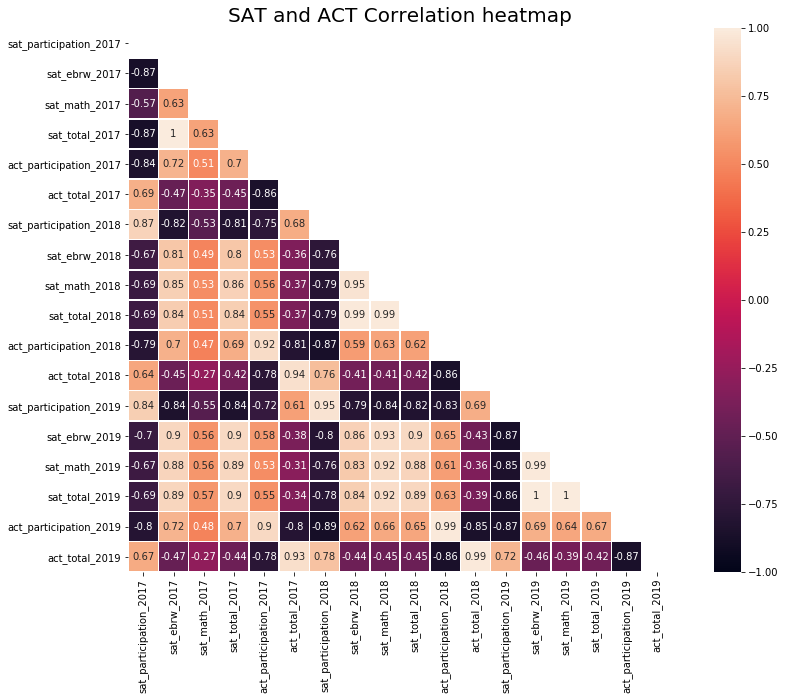

In [392]:
fig, ax = plt.subplots(figsize=(15, 10))

mask = np.zeros_like(allscore_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(allscore_corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)
ax.set_title("SAT and ACT Correlation heatmap",fontsize=20)

### Histrograms

In [393]:
def plot_hist(dataframe,columns,title,xaxis):
    fig, axs = plt.subplots(1,len(columns),figsize=(15,len(columns)))
    for i, column in enumerate(columns): 
        axs[i].hist(dataframe[column])
        axs[i].set_title(title[i])
        axs[i].set_xlabel(xaxis)
        
    plt.tight_layout()

#### Participation Distribution

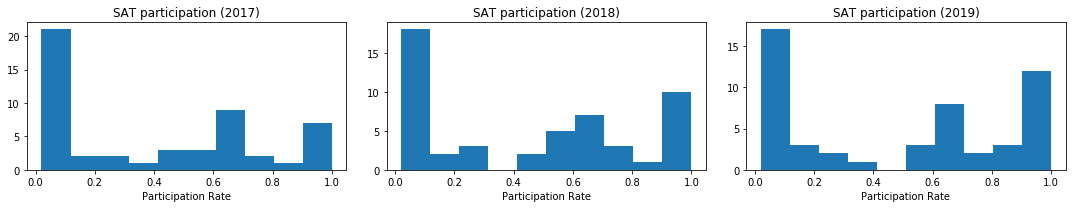

In [394]:
sat_parti_col = ['sat_participation_2017','sat_participation_2018','sat_participation_2019']
sat_parti_titles = ['SAT participation (2017)','SAT participation (2018)','SAT participation (2019)']
xaxis = 'Participation Rate'

plot_hist(allscore,sat_parti_col,sat_parti_titles,xaxis)

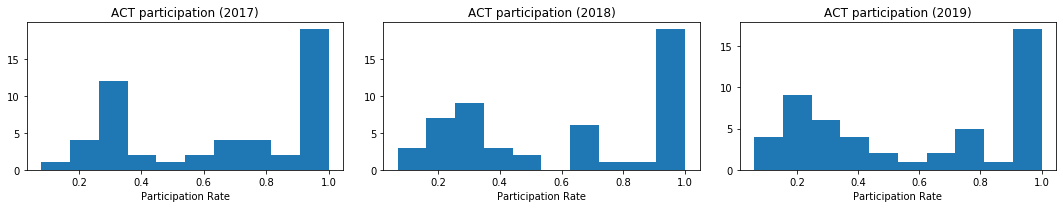

In [395]:
act_parti_col = ['act_participation_2017','act_participation_2018','act_participation_2019']
act_parti_titles = ['ACT participation (2017)','ACT participation (2018)','ACT participation (2019)']
xaxis = 'Participation Rate'

plot_hist(allscore,act_parti_col,act_parti_titles,xaxis)

#### Total Score Distribution

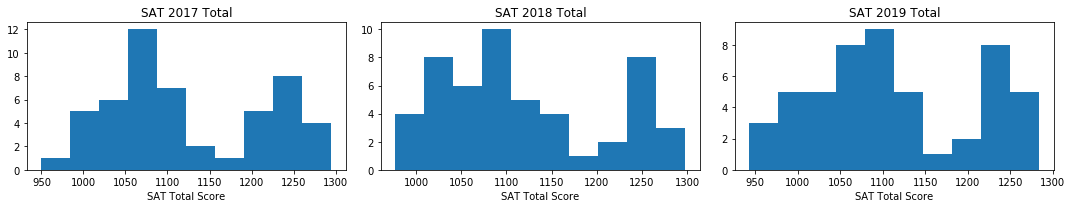

In [396]:
sat_total_col = ['sat_total_2017','sat_total_2018','sat_total_2019']
sat_total_title = ['SAT 2017 Total','SAT 2018 Total','SAT 2019 Total']
xaxis = 'SAT Total Score'

plot_hist(allscore,sat_total_col,sat_total_title, xaxis)

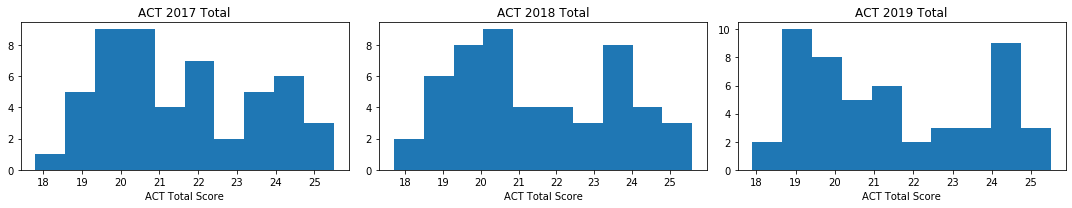

In [397]:
act_total_col = ['act_total_2017','act_total_2018','act_total_2019']
act_total_title = ['ACT 2017 Total','ACT 2018 Total','ACT 2019 Total']
xaxis = 'ACT Total Score'

plot_hist(allscore,act_total_col,act_total_title,xaxis)

#### SAT Individual Section Score Distribution

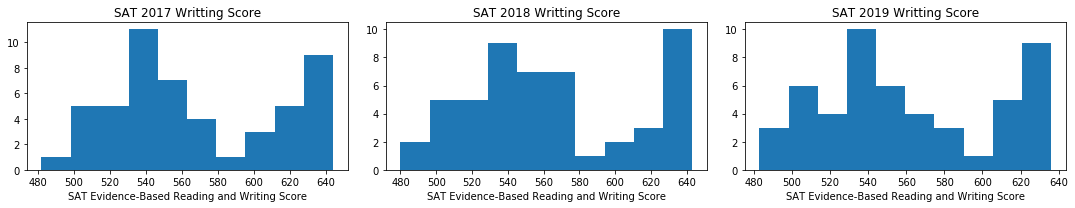

In [398]:
sat_ebrw_col = ['sat_ebrw_2017', 'sat_ebrw_2018', 'sat_ebrw_2019']
sat_ebrw_title = ['SAT 2017 Writting Score','SAT 2018 Writting Score','SAT 2019 Writting Score']
xaxis = 'SAT Evidence-Based Reading and Writing Score'

plot_hist(allscore,sat_ebrw_col,sat_ebrw_title,xaxis)

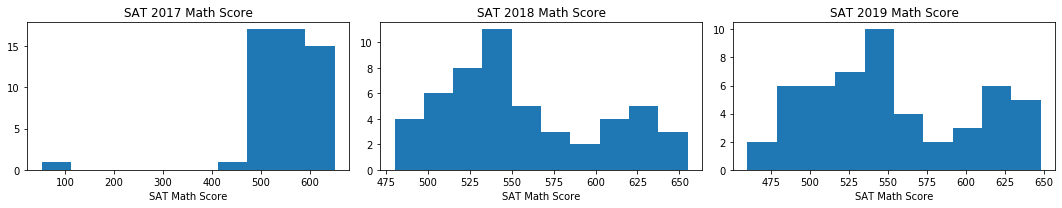

In [399]:
sat_math_col = ['sat_math_2017', 'sat_math_2018', 'sat_math_2019']
sat_math_title = ['SAT 2017 Math Score','SAT 2018 Math Score','SAT 2019 Math Score']
xaxis = 'SAT Math Score'

plot_hist(allscore,sat_math_col,sat_math_title,xaxis)

### Boxplot 

#### Participation Rate

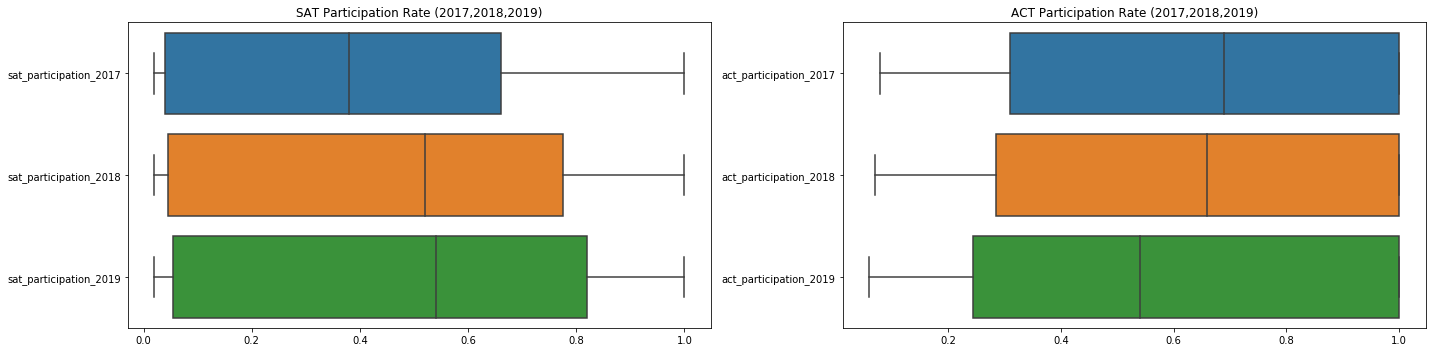

In [400]:
plt.figsize=(15, 10)


plt.figure(figsize = (20,5))

ax1 = plt.subplot(1, 2, 1)
ax1=sns.boxplot(data=allscore[sat_parti_col],orient='h')
ax1.set_title('SAT Participation Rate (2017,2018,2019)')

ax2 = plt.subplot(1, 2, 2)
ax2=sns.boxplot(data=allscore[act_parti_col],orient='h')
ax2.set_title('ACT Participation Rate (2017,2018,2019)')

plt.tight_layout()

#### Total Score

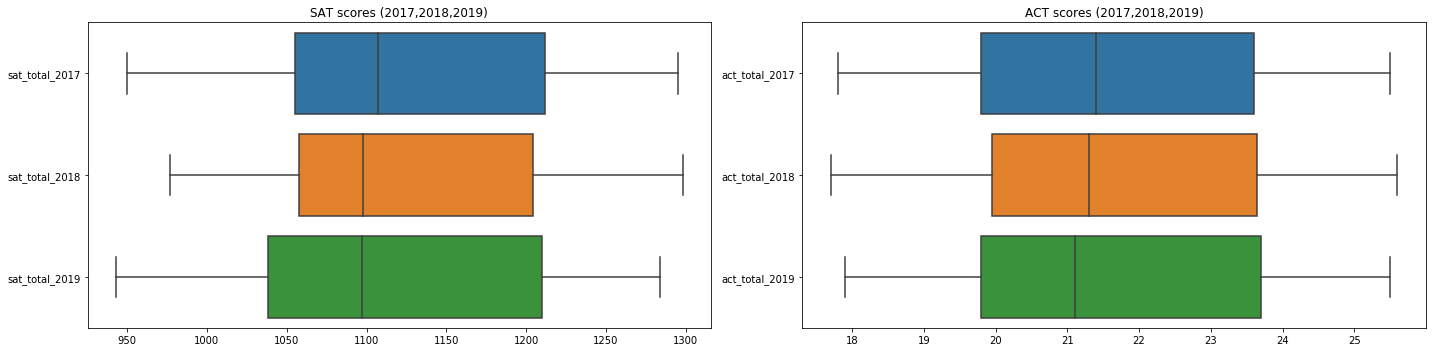

In [401]:
plt.figure(figsize = (20,5))

ax1 = plt.subplot(1, 2, 1)
ax1=sns.boxplot(data = allscore[sat_total_col],orient='h')
ax1.set_title('SAT scores (2017,2018,2019)')

ax2 = plt.subplot(1, 2, 2)
ax2=sns.boxplot(data = allscore[act_total_col],orient='h')
ax2.set_title('ACT scores (2017,2018,2019)')

plt.tight_layout()

#### SAT Individual Section Score

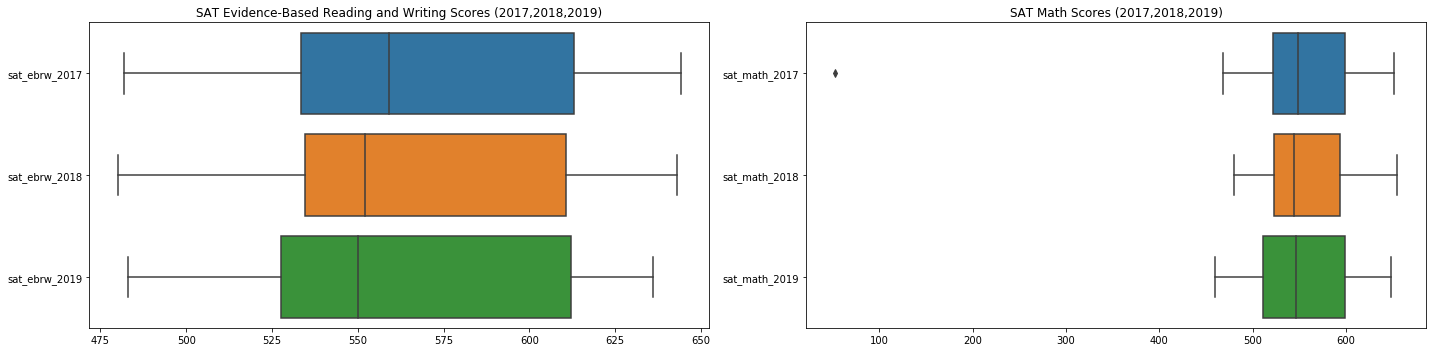

In [402]:
plt.figure(figsize = (20,5))

ax1 = plt.subplot(1, 2, 1)
ax1=sns.boxplot(data = allscore[sat_ebrw_col],orient='h')
ax1.set_title('SAT Evidence-Based Reading and Writing Scores (2017,2018,2019)')

ax2 = plt.subplot(1, 2, 2)
ax2=sns.boxplot(data = allscore[sat_math_col],orient='h')
ax2.set_title('SAT Math Scores (2017,2018,2019)')

plt.tight_layout()

### Scatter Plot

#### SAT V ACT Total Score

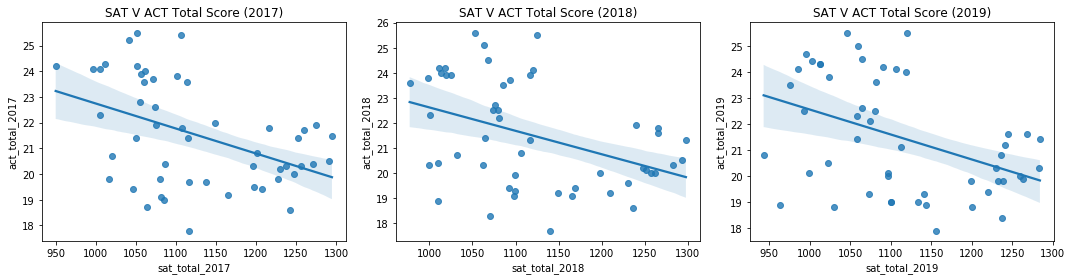

In [403]:
plt.figure(figsize = (15,4))

ax1 = plt.subplot(1, 3, 1)
ax1=sns.regplot(x='sat_total_2017', y='act_total_2017', data=allscore)
ax1.set_title('SAT V ACT Total Score (2017)')

ax2 = plt.subplot(1, 3, 2)
ax2=sns.regplot(x='sat_total_2018', y='act_total_2018', data=allscore)
ax2.set_title('SAT V ACT Total Score (2018)')

ax3 = plt.subplot(1, 3, 3)
ax3=sns.regplot(x='sat_total_2019', y='act_total_2019', data=allscore)
ax3.set_title('SAT V ACT Total Score (2019)')

plt.tight_layout()

#### SAT V ACT Participation Rate

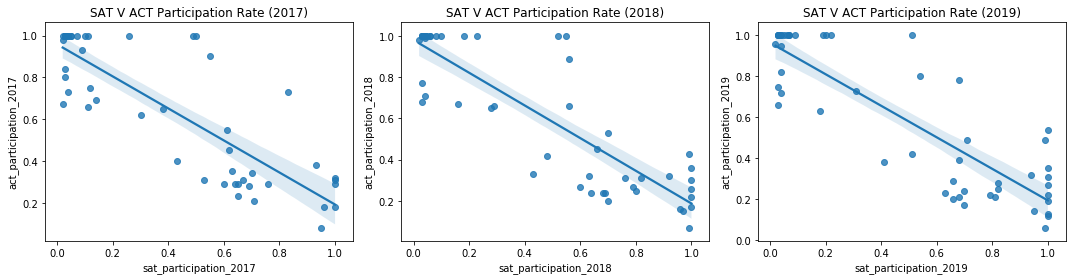

In [404]:
plt.figure(figsize = (15,4))

ax1 = plt.subplot(1, 3, 1)
ax1=sns.regplot(x='sat_participation_2017', y='act_participation_2017', data=allscore)
ax1.set_title('SAT V ACT Participation Rate (2017)')

ax2 = plt.subplot(1, 3, 2)
ax2=sns.regplot(x='sat_participation_2018', y='act_participation_2018', data=allscore)
ax2.set_title('SAT V ACT Participation Rate (2018)')

ax3 = plt.subplot(1, 3, 3)
ax3=sns.regplot(x='sat_participation_2019', y='act_participation_2019', data=allscore)
ax3.set_title('SAT V ACT Participation Rate (2019)')

plt.tight_layout()

#### Partipation Rate V Score

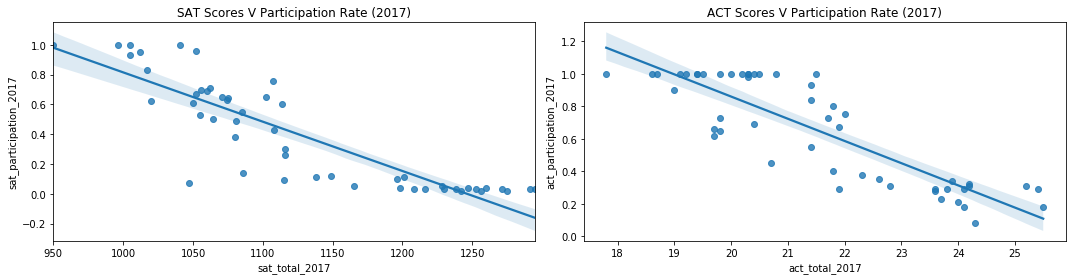

In [405]:
plt.figure(figsize = (15,4))

ax1 = plt.subplot(1, 2, 1)
ax1=sns.regplot(x='sat_total_2017', y='sat_participation_2017', data=allscore)
ax1.set_title('SAT Scores V Participation Rate (2017)')

ax2 = plt.subplot(1, 2, 2)
ax2=sns.regplot(x='act_total_2017', y='act_participation_2017', data=allscore)
ax2.set_title('ACT Scores V Participation Rate (2017)')

plt.tight_layout()

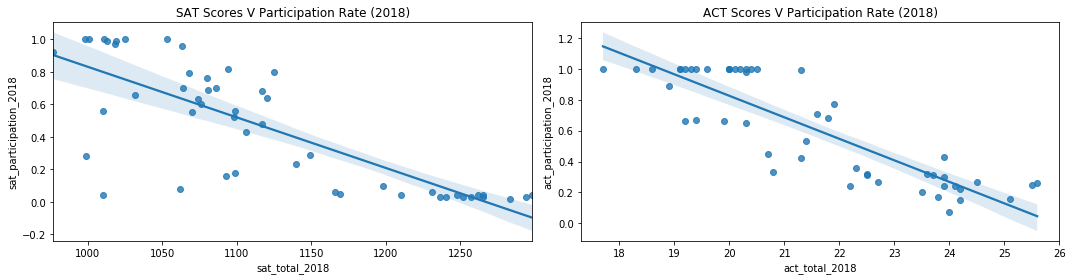

In [406]:
plt.figure(figsize = (15,4))

ax1 = plt.subplot(1, 2, 1)
ax1=sns.regplot(x='sat_total_2018', y='sat_participation_2018', data=allscore)
ax1.set_title('SAT Scores V Participation Rate (2018)')

ax2 = plt.subplot(1, 2, 2)
ax2=sns.regplot(x='act_total_2018', y='act_participation_2018', data=allscore)
ax2.set_title('ACT Scores V Participation Rate (2018)')

plt.tight_layout()

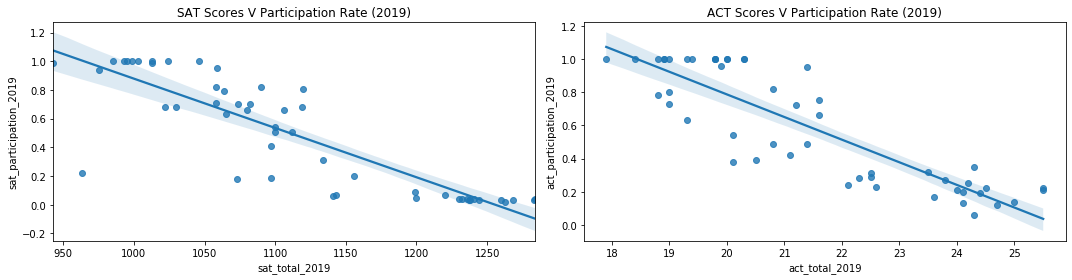

In [407]:
plt.figure(figsize = (15,4))

ax1 = plt.subplot(1, 2, 1)
ax1=sns.regplot(x='sat_total_2019', y='sat_participation_2019', data=allscore)
ax1.set_title('SAT Scores V Participation Rate (2019)')

ax2 = plt.subplot(1, 2, 2)
ax2=sns.regplot(x='act_total_2019', y='act_participation_2019', data=allscore)
ax2.set_title('ACT Scores V Participation Rate (2019)')

plt.tight_layout()

In [408]:
#by State
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island','Vermont','New Jersey', 'New York', 'Pennsylvania']
midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin','Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee','Arkansas', 'Louisiana','Oklahoma', 'Texas']
west= ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah','Wyoming','Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']

#check that it totals to 51
len(northeast)+len(midwest)+len(south)+len(west)

#set region in allscore dataframe
allscore['region'] = ['Northeast' if state in northeast else 'Midwest' if state in midwest else 'South' if state in south else 'West' for state in allscore.state]
allscore[['state','region']].sort_values('state').head()

,state,region
0,Alabama,South
1,Alaska,West
2,Arizona,West
3,Arkansas,South
4,California,West


<Figure size 1080x288 with 0 Axes>

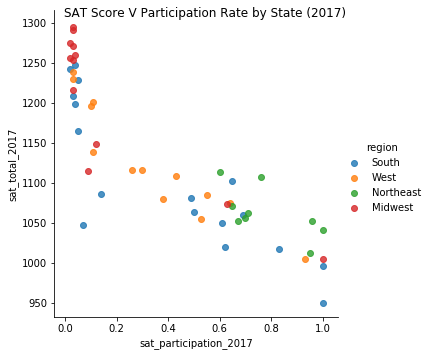

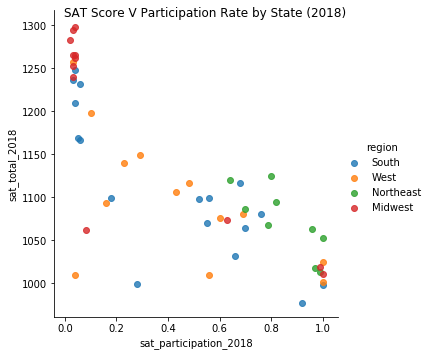

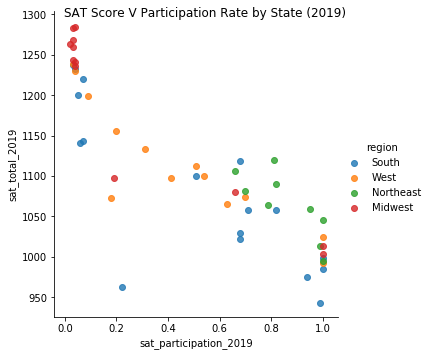

In [409]:
#plot
plt.figure(figsize = (15,4))

ax1 = sns.lmplot('sat_participation_2017', 'sat_total_2017', data=allscore, hue='region', fit_reg=False)
ax1.fig.suptitle('SAT Score V Participation Rate by State (2017)')

ax2 = sns.lmplot('sat_participation_2018', 'sat_total_2018', data=allscore, hue='region', fit_reg=False)
ax2.fig.suptitle('SAT Score V Participation Rate by State (2018)')

ax3 = sns.lmplot('sat_participation_2019', 'sat_total_2019', data=allscore, hue='region', fit_reg=False)
ax3.fig.suptitle('SAT Score V Participation Rate by State (2019)')

plt.show()

<Figure size 1080x288 with 0 Axes>

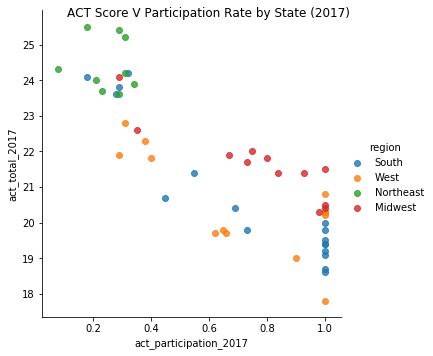

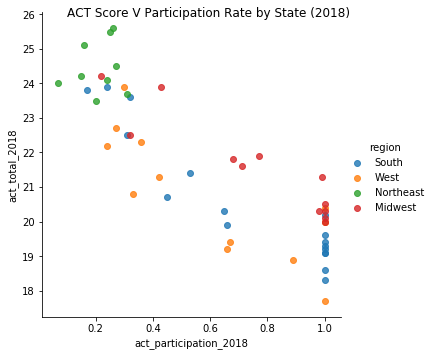

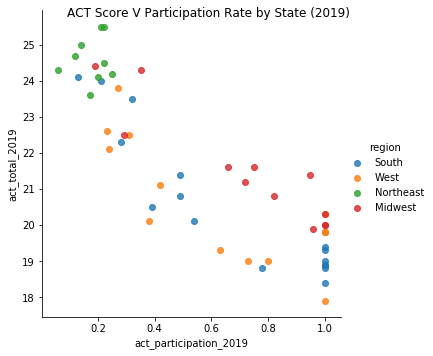

In [410]:
#plot
plt.figure(figsize = (15,4))

ax1 = sns.lmplot('act_participation_2017', 'act_total_2017', data=allscore, hue='region', fit_reg=False)
ax1.fig.suptitle('ACT Score V Participation Rate by State (2017)')

ax2 = sns.lmplot('act_participation_2018', 'act_total_2018', data=allscore, hue='region', fit_reg=False)
ax2.fig.suptitle('ACT Score V Participation Rate by State (2018)')

ax3 = sns.lmplot('act_participation_2019', 'act_total_2019', data=allscore, hue='region', fit_reg=False)
ax3.fig.suptitle('ACT Score V Participation Rate by State (2019)')

plt.show()

#### Participation Rate v Particiaption Rate

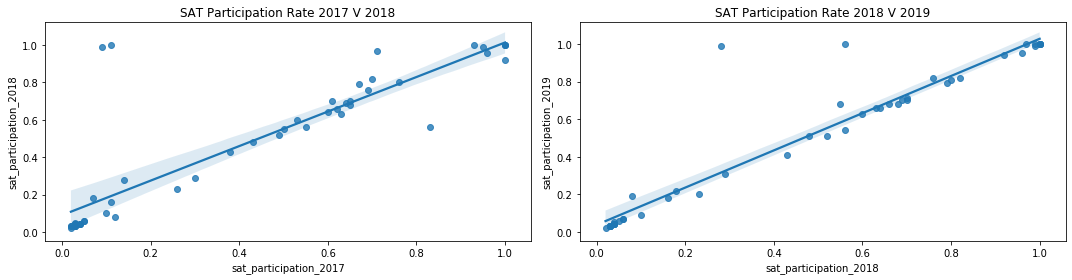

In [411]:
plt.figure(figsize = (15,4))

ax1 = plt.subplot(1, 2, 1)
ax1=sns.regplot(x='sat_participation_2017', y='sat_participation_2018', data=allscore)
ax1.set_title('SAT Participation Rate 2017 V 2018')

ax2 = plt.subplot(1, 2, 2)
ax2=sns.regplot(x='sat_participation_2018', y='sat_participation_2019', data=allscore)
ax2.set_title('SAT Participation Rate 2018 V 2019')

plt.tight_layout()

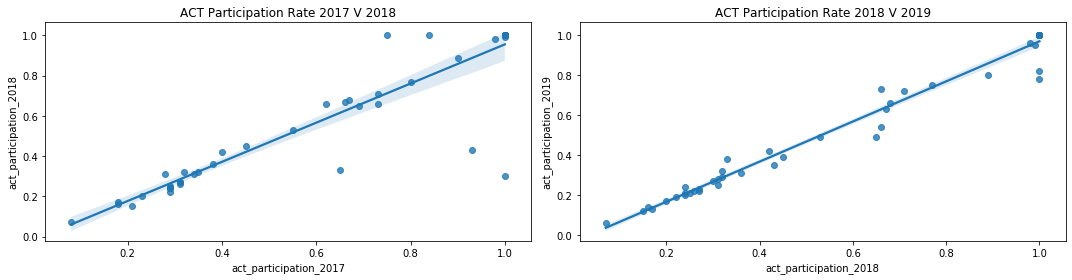

In [412]:
plt.figure(figsize = (15,4))

ax1 = plt.subplot(1, 2, 1)
ax1=sns.regplot(x='act_participation_2017', y='act_participation_2018', data=allscore)
ax1.set_title('ACT Participation Rate 2017 V 2018')

ax2 = plt.subplot(1, 2, 2)
ax2=sns.regplot(x='act_participation_2018', y='act_participation_2019', data=allscore)
ax2.set_title('ACT Participation Rate 2018 V 2019')

plt.tight_layout()

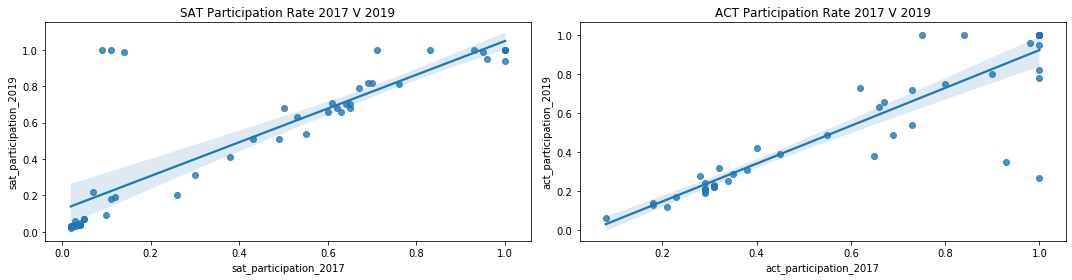

In [413]:
plt.figure(figsize = (15,4))

ax1 = plt.subplot(1, 2, 1)
ax1=sns.regplot(x='sat_participation_2017', y='sat_participation_2019', data=allscore)
ax1.set_title('SAT Participation Rate 2017 V 2019')

ax2 = plt.subplot(1, 2, 2)
ax2=sns.regplot(x='act_participation_2017', y='act_participation_2019', data=allscore)
ax2.set_title('ACT Participation Rate 2017 V 2019')

plt.tight_layout()

### Bar Plot

Text(0.5, 1.0, 'ACT Participation (2017)')

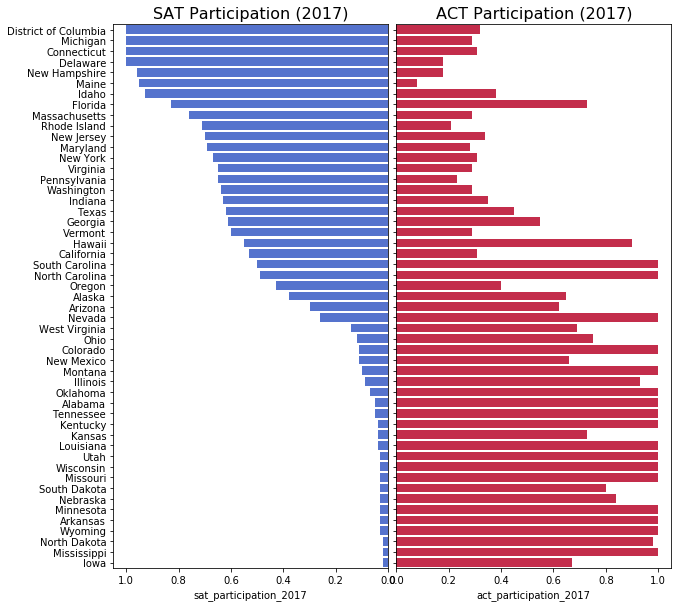

In [414]:
fig, ax = plt.subplots(1,2,figsize=(10, 10),sharey=True) 
plt.subplots_adjust(wspace=0.03)

# SAT participation 2017
allscore = allscore.sort_values(by='sat_participation_2017',ascending=False)
sns.barplot(y=allscore.state.values, x='sat_participation_2017',data=allscore,color='royalblue',ax=ax[0],orient='h')
ax[0].set_title('SAT Participation (2017)',fontsize=16)
ax[0].invert_xaxis()

# ACT participation 2017
sns.barplot(y=allscore.state.values, x='act_participation_2017',data=allscore,color='crimson',ax=ax[1],orient='h')
ax[1].set_title('ACT Participation (2017)',fontsize=16)

Text(0.5, 1.0, 'ACT Participation (2018)')

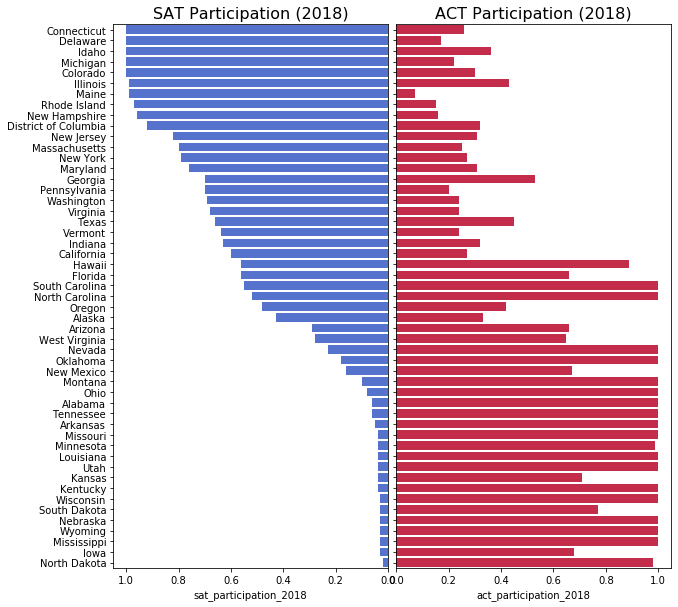

In [415]:
fig, ax = plt.subplots(1,2,figsize=(10, 10),sharey=True) 
plt.subplots_adjust(wspace=0.03)

# SAT participation 2018
allscore = allscore.sort_values(by='sat_participation_2018',ascending=False)
sns.barplot(y=allscore.state.values, x='sat_participation_2018',data=allscore,color='royalblue',ax=ax[0],orient='h')
ax[0].set_title('SAT Participation (2018)',fontsize=16)
ax[0].invert_xaxis()

# ACT participation 2018
sns.barplot(y=allscore.state.values, x='act_participation_2018',data=allscore,color='crimson',ax=ax[1],orient='h')
ax[1].set_title('ACT Participation (2018)',fontsize=16)

Text(0.5, 1.0, 'ACT Participation (2019)')

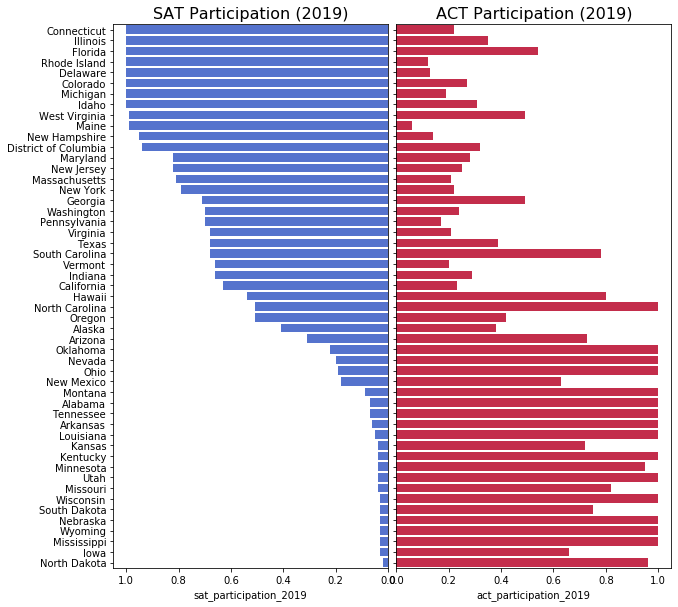

In [416]:
fig, ax = plt.subplots(1,2,figsize=(10, 10),sharey=True) 
plt.subplots_adjust(wspace=0.03)

# SAT participation 2019
allscore = allscore.sort_values(by='sat_participation_2019',ascending=False)
sns.barplot(y=allscore.state.values, x='sat_participation_2019',data=allscore,color='royalblue',ax=ax[0],orient='h')
ax[0].set_title('SAT Participation (2019)',fontsize=16)
ax[0].invert_xaxis()

# ACT participation 2019
sns.barplot(y=allscore.state.values, x='act_participation_2019',data=allscore,color='crimson',ax=ax[1],orient='h')
ax[1].set_title('ACT Participation (2019)',fontsize=16)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*